In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = os.path.join(os.path.expanduser("~"),"Documents\Lucas\Personal\hackathon_mE\data\processed")
file_path = os.path.join(path, "FAOSTAT_data_en_7-30-2024_processed.csv")




In [3]:
df = pd.read_csv(file_path, sep=';', encoding='utf-8')
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88965,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2018,2018,t,42.77,I,Imputed value,Imputed value
88966,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2019,2019,t,42.77,I,Imputed value,Imputed value
88967,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2020,2020,t,42.77,I,Imputed value,Imputed value
88968,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2021,2021,t,42.77,I,Imputed value,Imputed value


In [4]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [5]:
def detectar_null_vacio(df):
    valores_vacion_null = {}
    for column in df.columns:
        nulls = df[column].isnull().sum()
        empties = (df[column]== '').sum()
        total = nulls + empties
        if total > 0:
            valores_vacion_null[column] = total
            
    return valores_vacion_null
    

resultado = detectar_null_vacio(df)

if resultado:
    for campo,cantidad in  resultado.items():
        print(f'El campo {campo} tiene {cantidad} valores NULL o vacios')
else:
    print('No hay campos NULL o vacios ')

El campo Value tiene 165 valores NULL o vacios
El campo Note tiene 19465 valores NULL o vacios


In [6]:
#correcciones valores vacios
df['Note'] = df['Note'].fillna(0)
df['Value'] = df['Value'].fillna(df['Value'].mean())

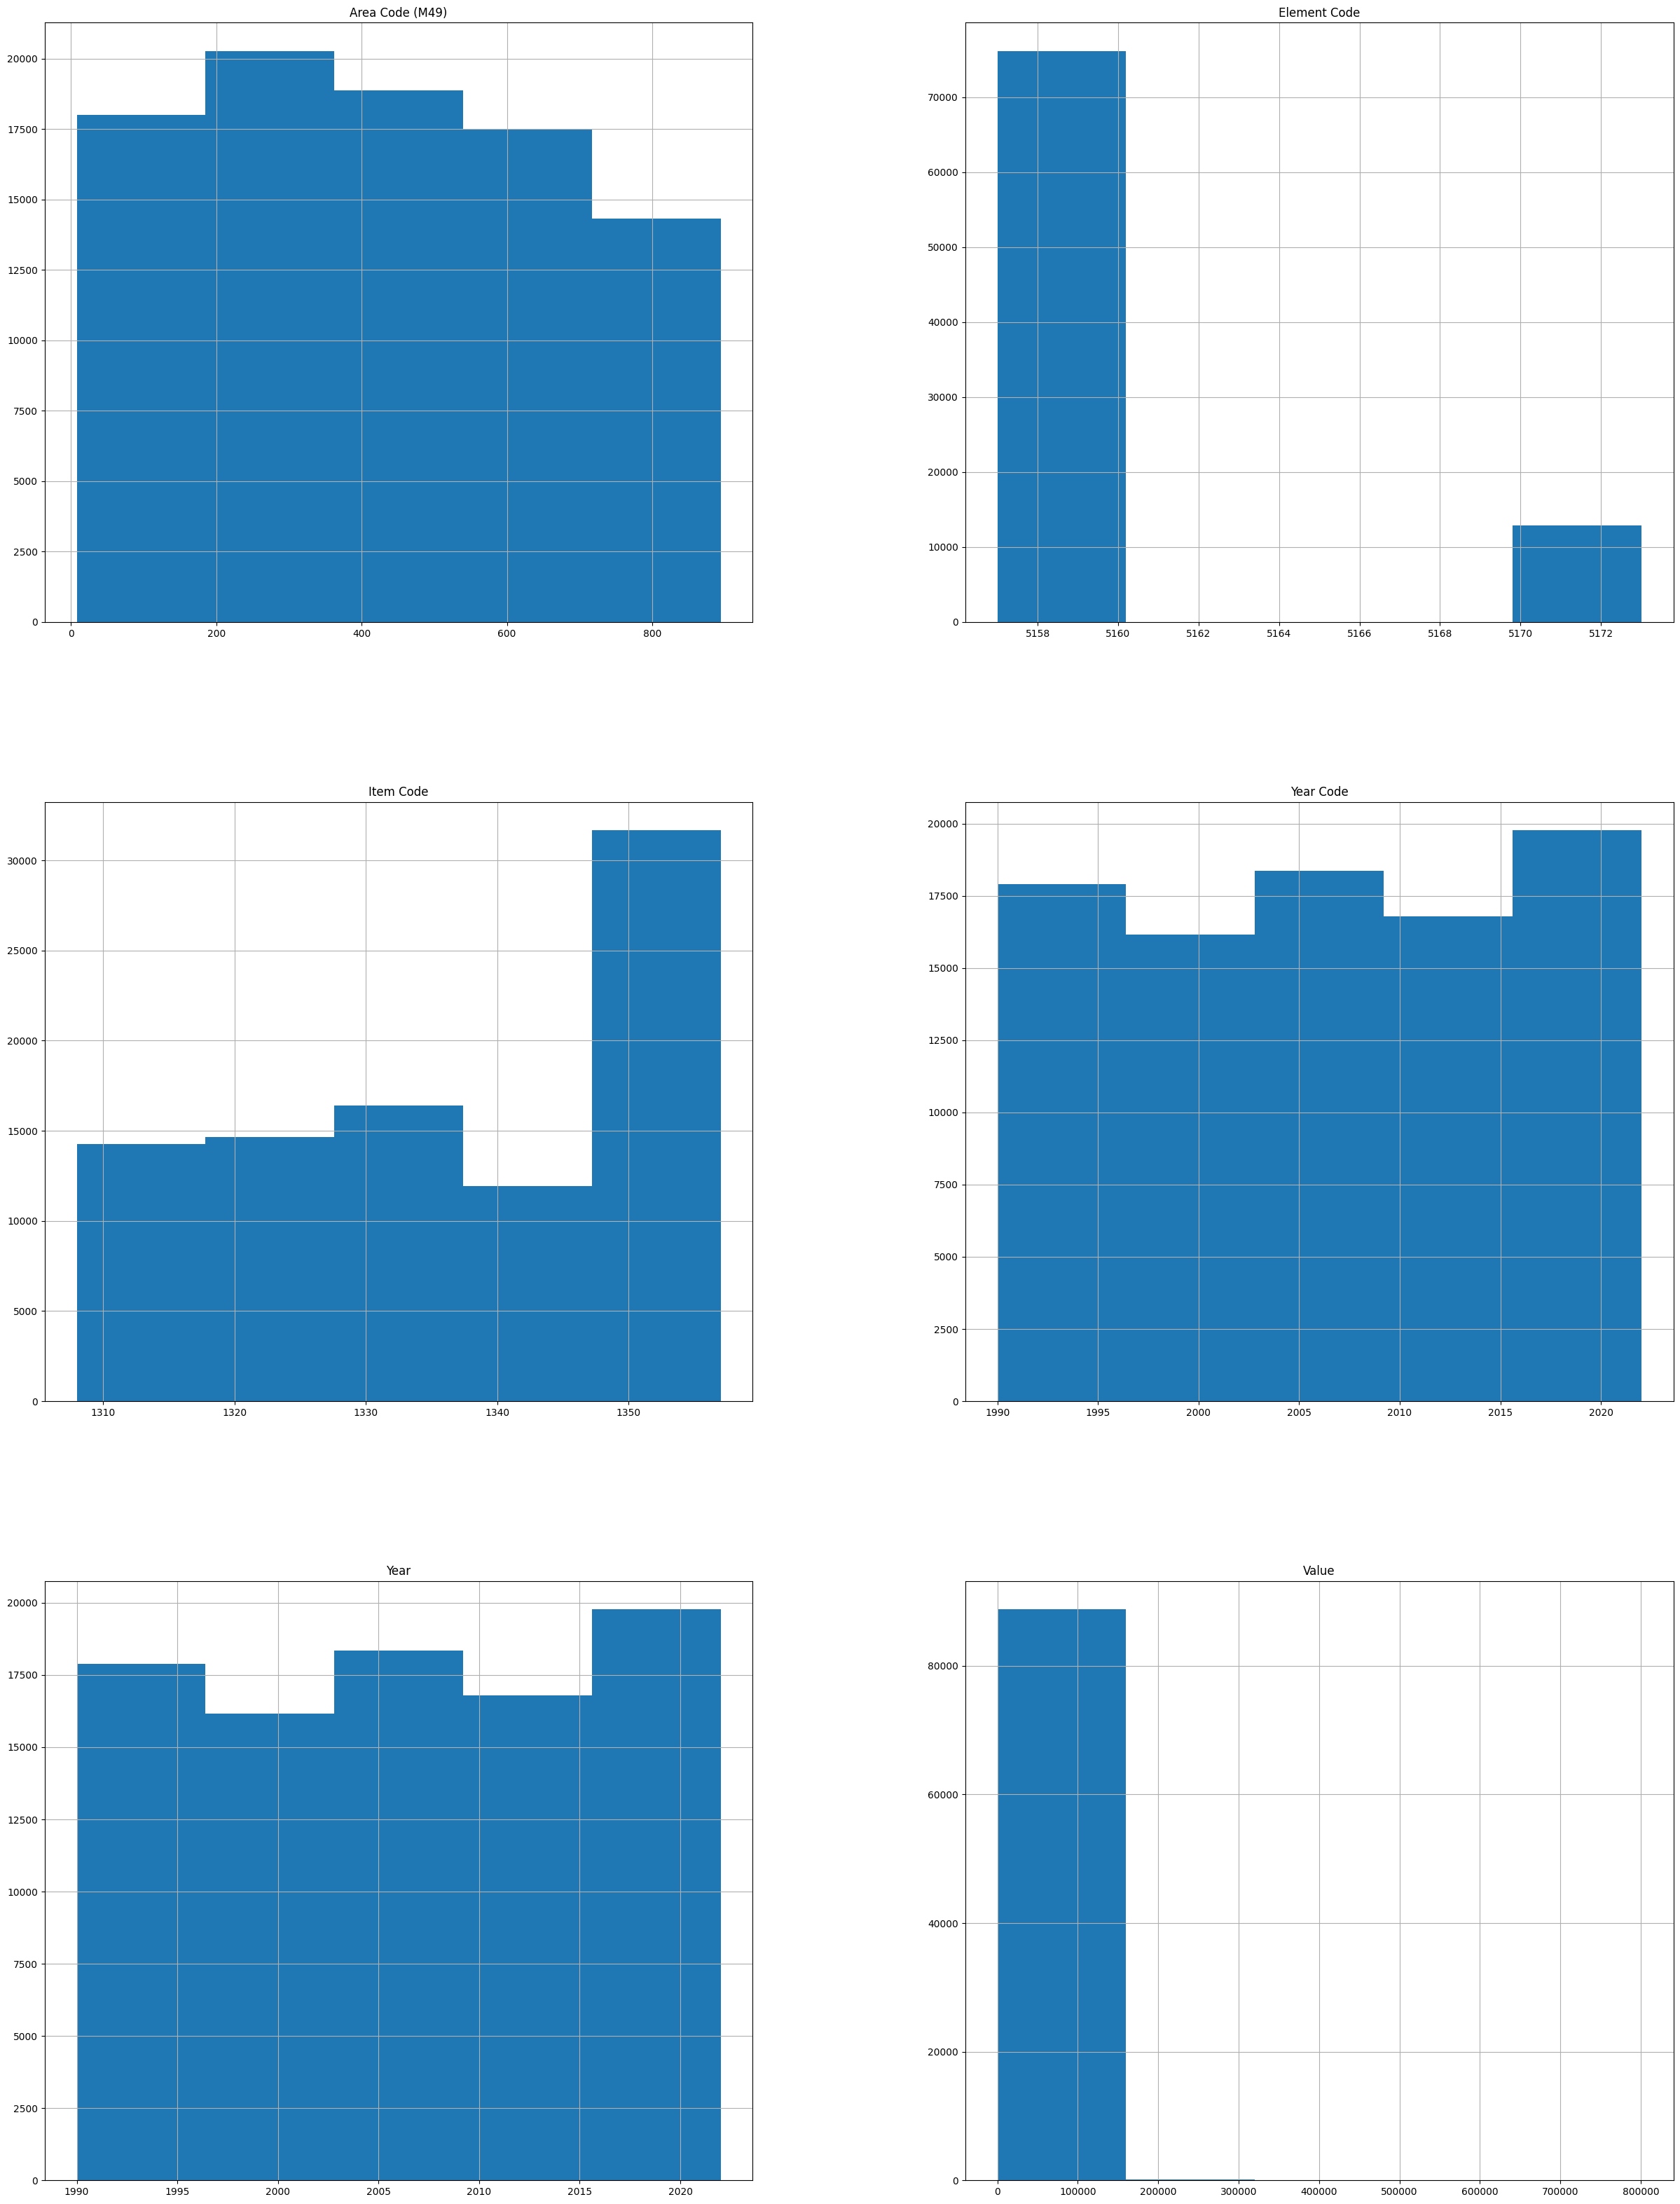

In [7]:
df.hist(bins=5,figsize=(30,40))
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88970 entries, 0 to 88969
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       88970 non-null  object 
 1   Domain            88970 non-null  object 
 2   Area Code (M49)   88970 non-null  int64  
 3   Area              88970 non-null  object 
 4   Element Code      88970 non-null  int64  
 5   Element           88970 non-null  object 
 6   Item Code         88970 non-null  int64  
 7   Item              88970 non-null  object 
 8   Year Code         88970 non-null  int64  
 9   Year              88970 non-null  int64  
 10  Unit              88970 non-null  object 
 11  Value             88970 non-null  float64
 12  Flag              88970 non-null  object 
 13  Flag Description  88970 non-null  object 
 14  Note              88970 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 10.2+ MB


In [9]:
columnas = df.columns
columnas

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [10]:
for columna in columnas:
    print(f"COLUMNA: {columna}")
    df_unique = df[columna].unique()
    print(f"Valores únicos en '{columna}':")
    for valor in df_unique:
        print(f"  - {valor}")
    print("\n")

COLUMNA: Domain Code
Valores únicos en 'Domain Code':
  - RP


COLUMNA: Domain
Valores únicos en 'Domain':
  - Pesticides Use


COLUMNA: Area Code (M49)
Valores únicos en 'Area Code (M49)':
  - 8
  - 12
  - 20
  - 24
  - 660
  - 28
  - 32
  - 51
  - 533
  - 36
  - 40
  - 31
  - 44
  - 48
  - 50
  - 52
  - 112
  - 56
  - 58
  - 84
  - 204
  - 60
  - 64
  - 68
  - 70
  - 72
  - 76
  - 92
  - 96
  - 100
  - 854
  - 108
  - 132
  - 116
  - 120
  - 124
  - 136
  - 140
  - 148
  - 152
  - 159
  - 344
  - 446
  - 156
  - 158
  - 170
  - 174
  - 178
  - 184
  - 188
  - 384
  - 191
  - 192
  - 196
  - 203
  - 200
  - 408
  - 180
  - 208
  - 262
  - 214
  - 218
  - 818
  - 222
  - 226
  - 232
  - 233
  - 748
  - 231
  - 230
  - 238
  - 234
  - 242
  - 246
  - 250
  - 258
  - 266
  - 270
  - 268
  - 276
  - 288
  - 300
  - 304
  - 308
  - 316
  - 320
  - 324
  - 624
  - 332
  - 336
  - 340
  - 348
  - 352
  - 356
  - 360
  - 364
  - 368
  - 372
  - 376
  - 380
  - 388
  - 392
  - 400
  - 398
  - 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area Code (M49),88970.0,425.007002,248.587401,8.0,214.00,414.00,634.00,894.00
Element Code,88970.0,5159.382949,5.406086,5157.0,5157.00,5157.00,5157.00,5173.00
Item Code,88970.0,1337.317219,17.218785,1308.0,1322.00,1337.00,1357.00,1357.00
Year Code,88970.0,2006.350669,9.447941,1990.0,1998.00,2007.00,2015.00,2022.00
Year,88970.0,2006.350669,9.447941,1990.0,1998.00,2007.00,2015.00,2022.00
Value,88970.0,2355.121268,17631.473869,0.0,0.64,12.17,258.74,800652.17


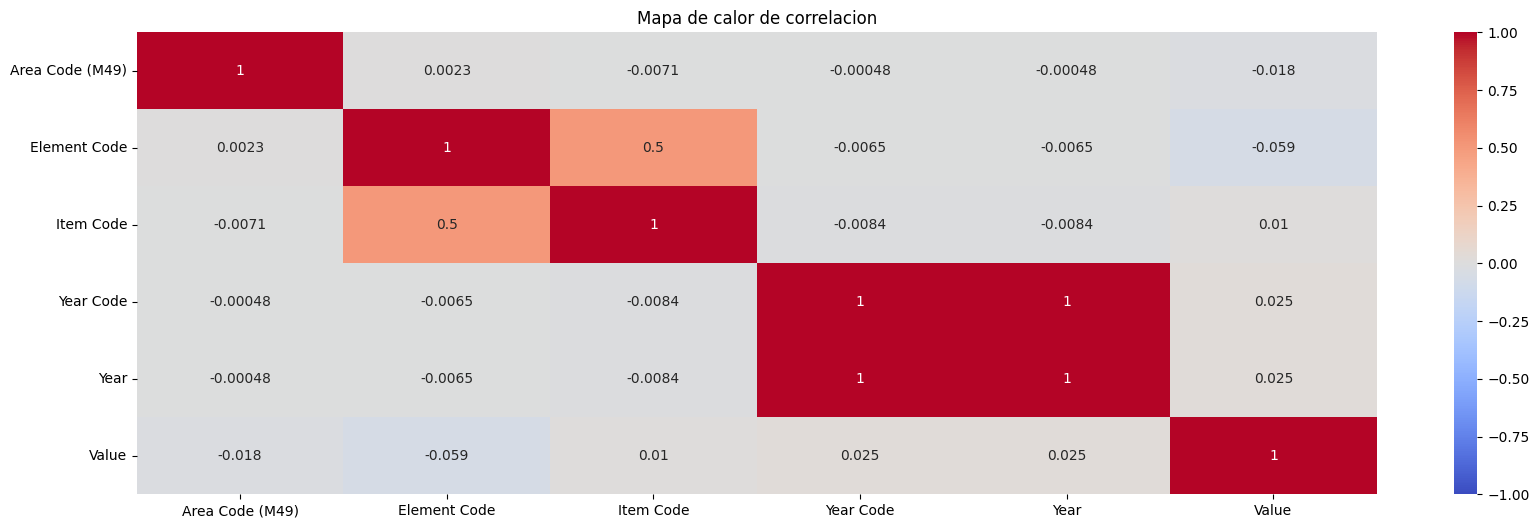

Pares de columnas con correlación fuerte:
Year y Year Code: 1.00


In [12]:
df_corr = df.select_dtypes(include=['int64','float64'])
correlation_matrix = df_corr.corr()
# Establecer un umbral para considerar una correlación como fuerte
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Mapa de calor de correlacion')
plt.show()
threshold = 0.6

# Encontrar pares de columnas con correlación fuerte
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            strong_correlations.append((colname1, colname2, correlation_value))

# Imprimir los resultados
print("Pares de columnas con correlación fuerte:")
for col1, col2, corr in strong_correlations:
    print(f"{col1} y {col2}: {corr:.2f}")

In [13]:
# Correlacion de Spearman
correlacion_spearman = df_corr.corr(method='spearman')
print(correlacion_spearman)

                 Area Code (M49)  Element Code  Item Code  Year Code  \
Area Code (M49)         1.000000      0.001469  -0.006506   0.000647   
Element Code            0.001469      1.000000   0.648734  -0.008847   
Item Code              -0.006506      0.648734   1.000000  -0.008821   
Year Code               0.000647     -0.008847  -0.008821   1.000000   
Year                    0.000647     -0.008847  -0.008821   1.000000   
Value                  -0.002191     -0.437444  -0.343370   0.017904   

                     Year     Value  
Area Code (M49)  0.000647 -0.002191  
Element Code    -0.008847 -0.437444  
Item Code       -0.008821 -0.343370  
Year Code        1.000000  0.017904  
Year             1.000000  0.017904  
Value            0.017904  1.000000  


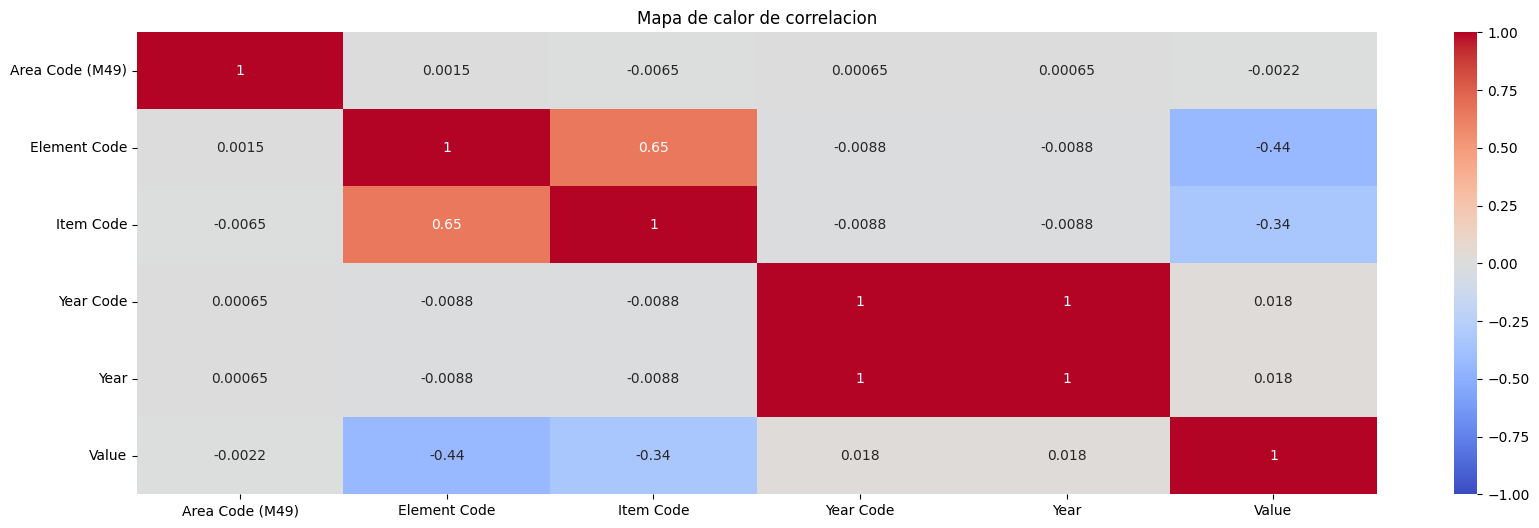

Pares de columnas con correlación fuerte:
Item Code y Element Code: 0.65
Year y Year Code: 1.00


In [14]:
plt.figure(figsize=(20,6))
sns.heatmap(correlacion_spearman,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Mapa de calor de correlacion')
plt.show()
threshold = 0.6

# Encontrar pares de columnas con correlación fuerte
strong_correlations = []
for i in range(len(correlacion_spearman.columns)):
    for j in range(i):
        if abs(correlacion_spearman.iloc[i, j]) > threshold:
            colname1 = correlacion_spearman.columns[i]
            colname2 = correlacion_spearman.columns[j]
            correlation_value = correlacion_spearman.iloc[i, j]
            strong_correlations.append((colname1, colname2, correlation_value))

# Imprimir los resultados
print("Pares de columnas con correlación fuerte:")
for col1, col2, corr in strong_correlations:
    print(f"{col1} y {col2}: {corr:.2f}")

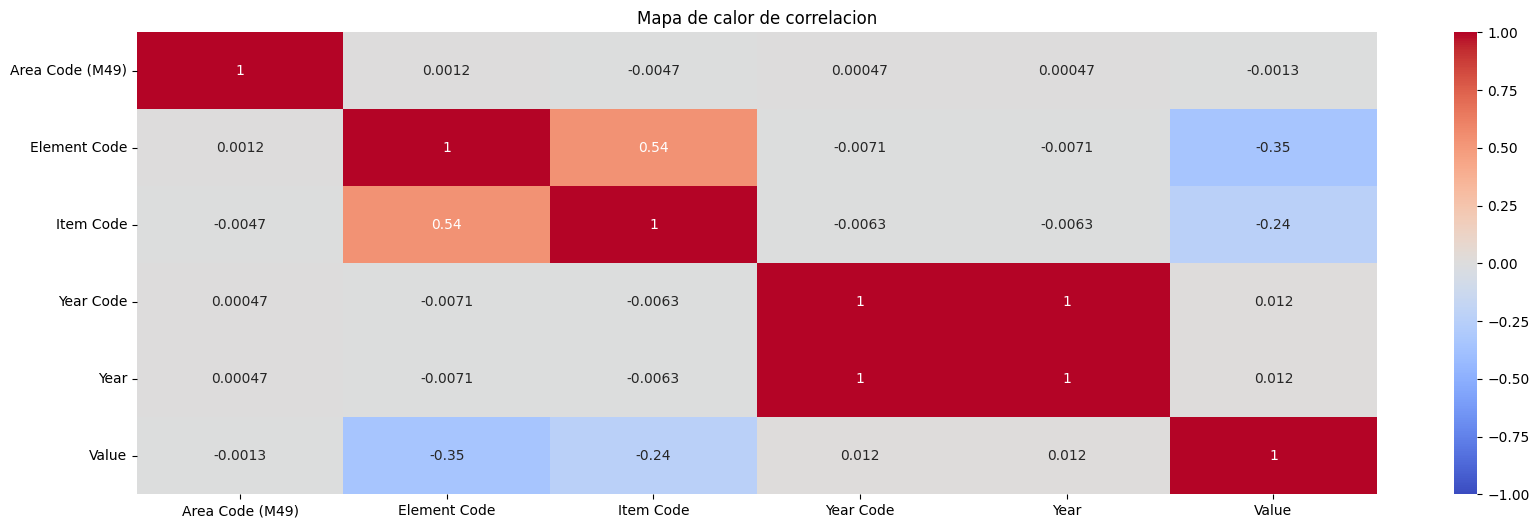

Pares de columnas con correlación fuerte:
Year y Year Code: 1.00


In [15]:
correlacion_kendall = df_corr.corr(method='kendall')

plt.figure(figsize=(20,6))
sns.heatmap(correlacion_kendall,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Mapa de calor de correlacion')
plt.show()
threshold = 0.6

# Encontrar pares de columnas con correlación fuerte
strong_correlations = []
for i in range(len(correlacion_kendall.columns)):
    for j in range(i):
        if abs(correlacion_kendall.iloc[i, j]) > threshold:
            colname1 = correlacion_kendall.columns[i]
            colname2 = correlacion_kendall.columns[j]
            correlation_value = correlacion_kendall.iloc[i, j]
            strong_correlations.append((colname1, colname2, correlation_value))

# Imprimir los resultados
print("Pares de columnas con correlación fuerte:")
for col1, col2, corr in strong_correlations:
    print(f"{col1} y {col2}: {corr:.2f}")

In [16]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,0
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,0
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,0
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [17]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,0
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,0
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,0
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [18]:
df_por_año = df.groupby(['Area Code (M49)','Element Code', 'Year']).size().reset_index(name='Cantidad')
df_por_año

,Area Code (M49),Element Code,Year,Cantidad
0,8,5157,1990,7
1,8,5157,1991,7
2,8,5157,1992,7
3,8,5157,1993,27
4,8,5157,1994,27
...,...,...,...,...
26325,894,5173,2018,1
26326,894,5173,2019,1
26327,894,5173,2020,1
26328,894,5173,2021,1


In [19]:
df_merge = pd.merge(df_por_año, df[['Area Code (M49)', 'Area', 'Element Code', 'Element','Year']],
                    on=['Area Code (M49)', 'Element Code','Year'], how='left').drop_duplicates()

In [20]:
df_merge

,Area Code (M49),Element Code,Year,Cantidad,Area,Element
0,8,5157,1990,7,Albania,Agricultural Use
7,8,5157,1991,7,Albania,Agricultural Use
14,8,5157,1992,7,Albania,Agricultural Use
21,8,5157,1993,27,Albania,Agricultural Use
48,8,5157,1994,27,Albania,Agricultural Use
...,...,...,...,...,...,...
88965,894,5173,2018,1,Zambia,Use per value of agricultural production
88966,894,5173,2019,1,Zambia,Use per value of agricultural production
88967,894,5173,2020,1,Zambia,Use per value of agricultural production
88968,894,5173,2021,1,Zambia,Use per value of agricultural production


In [21]:
import matplotlib
import matplotlib.pyplot as plt

<Figure size 2000x2500 with 0 Axes>

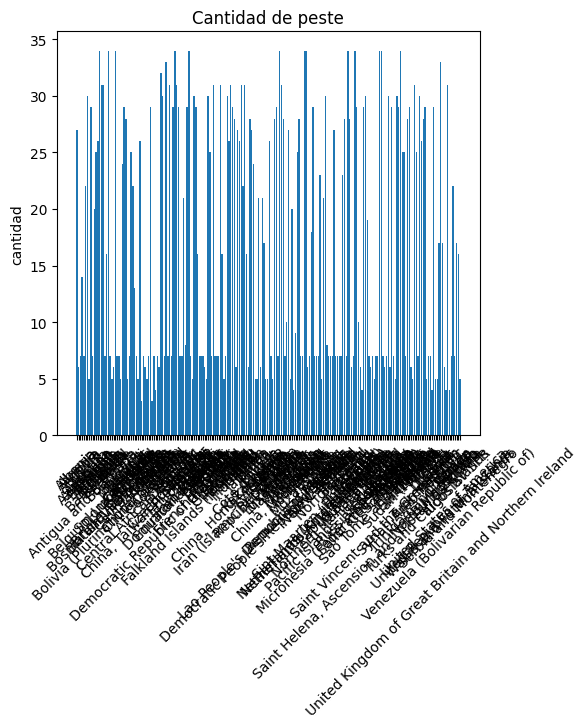

In [22]:

plt.figure(figsize=(20,25))

fig, ax = plt.subplots()
ax.set_ylabel('cantidad')  
ax.set_title('Cantidad de peste')
plt.bar(df_merge['Area'], df_merge['Cantidad'])
# Ajustar el layout
plt.tight_layout()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\4099115944.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Cantidad', hue='Element', data=df_merge, ci=None)


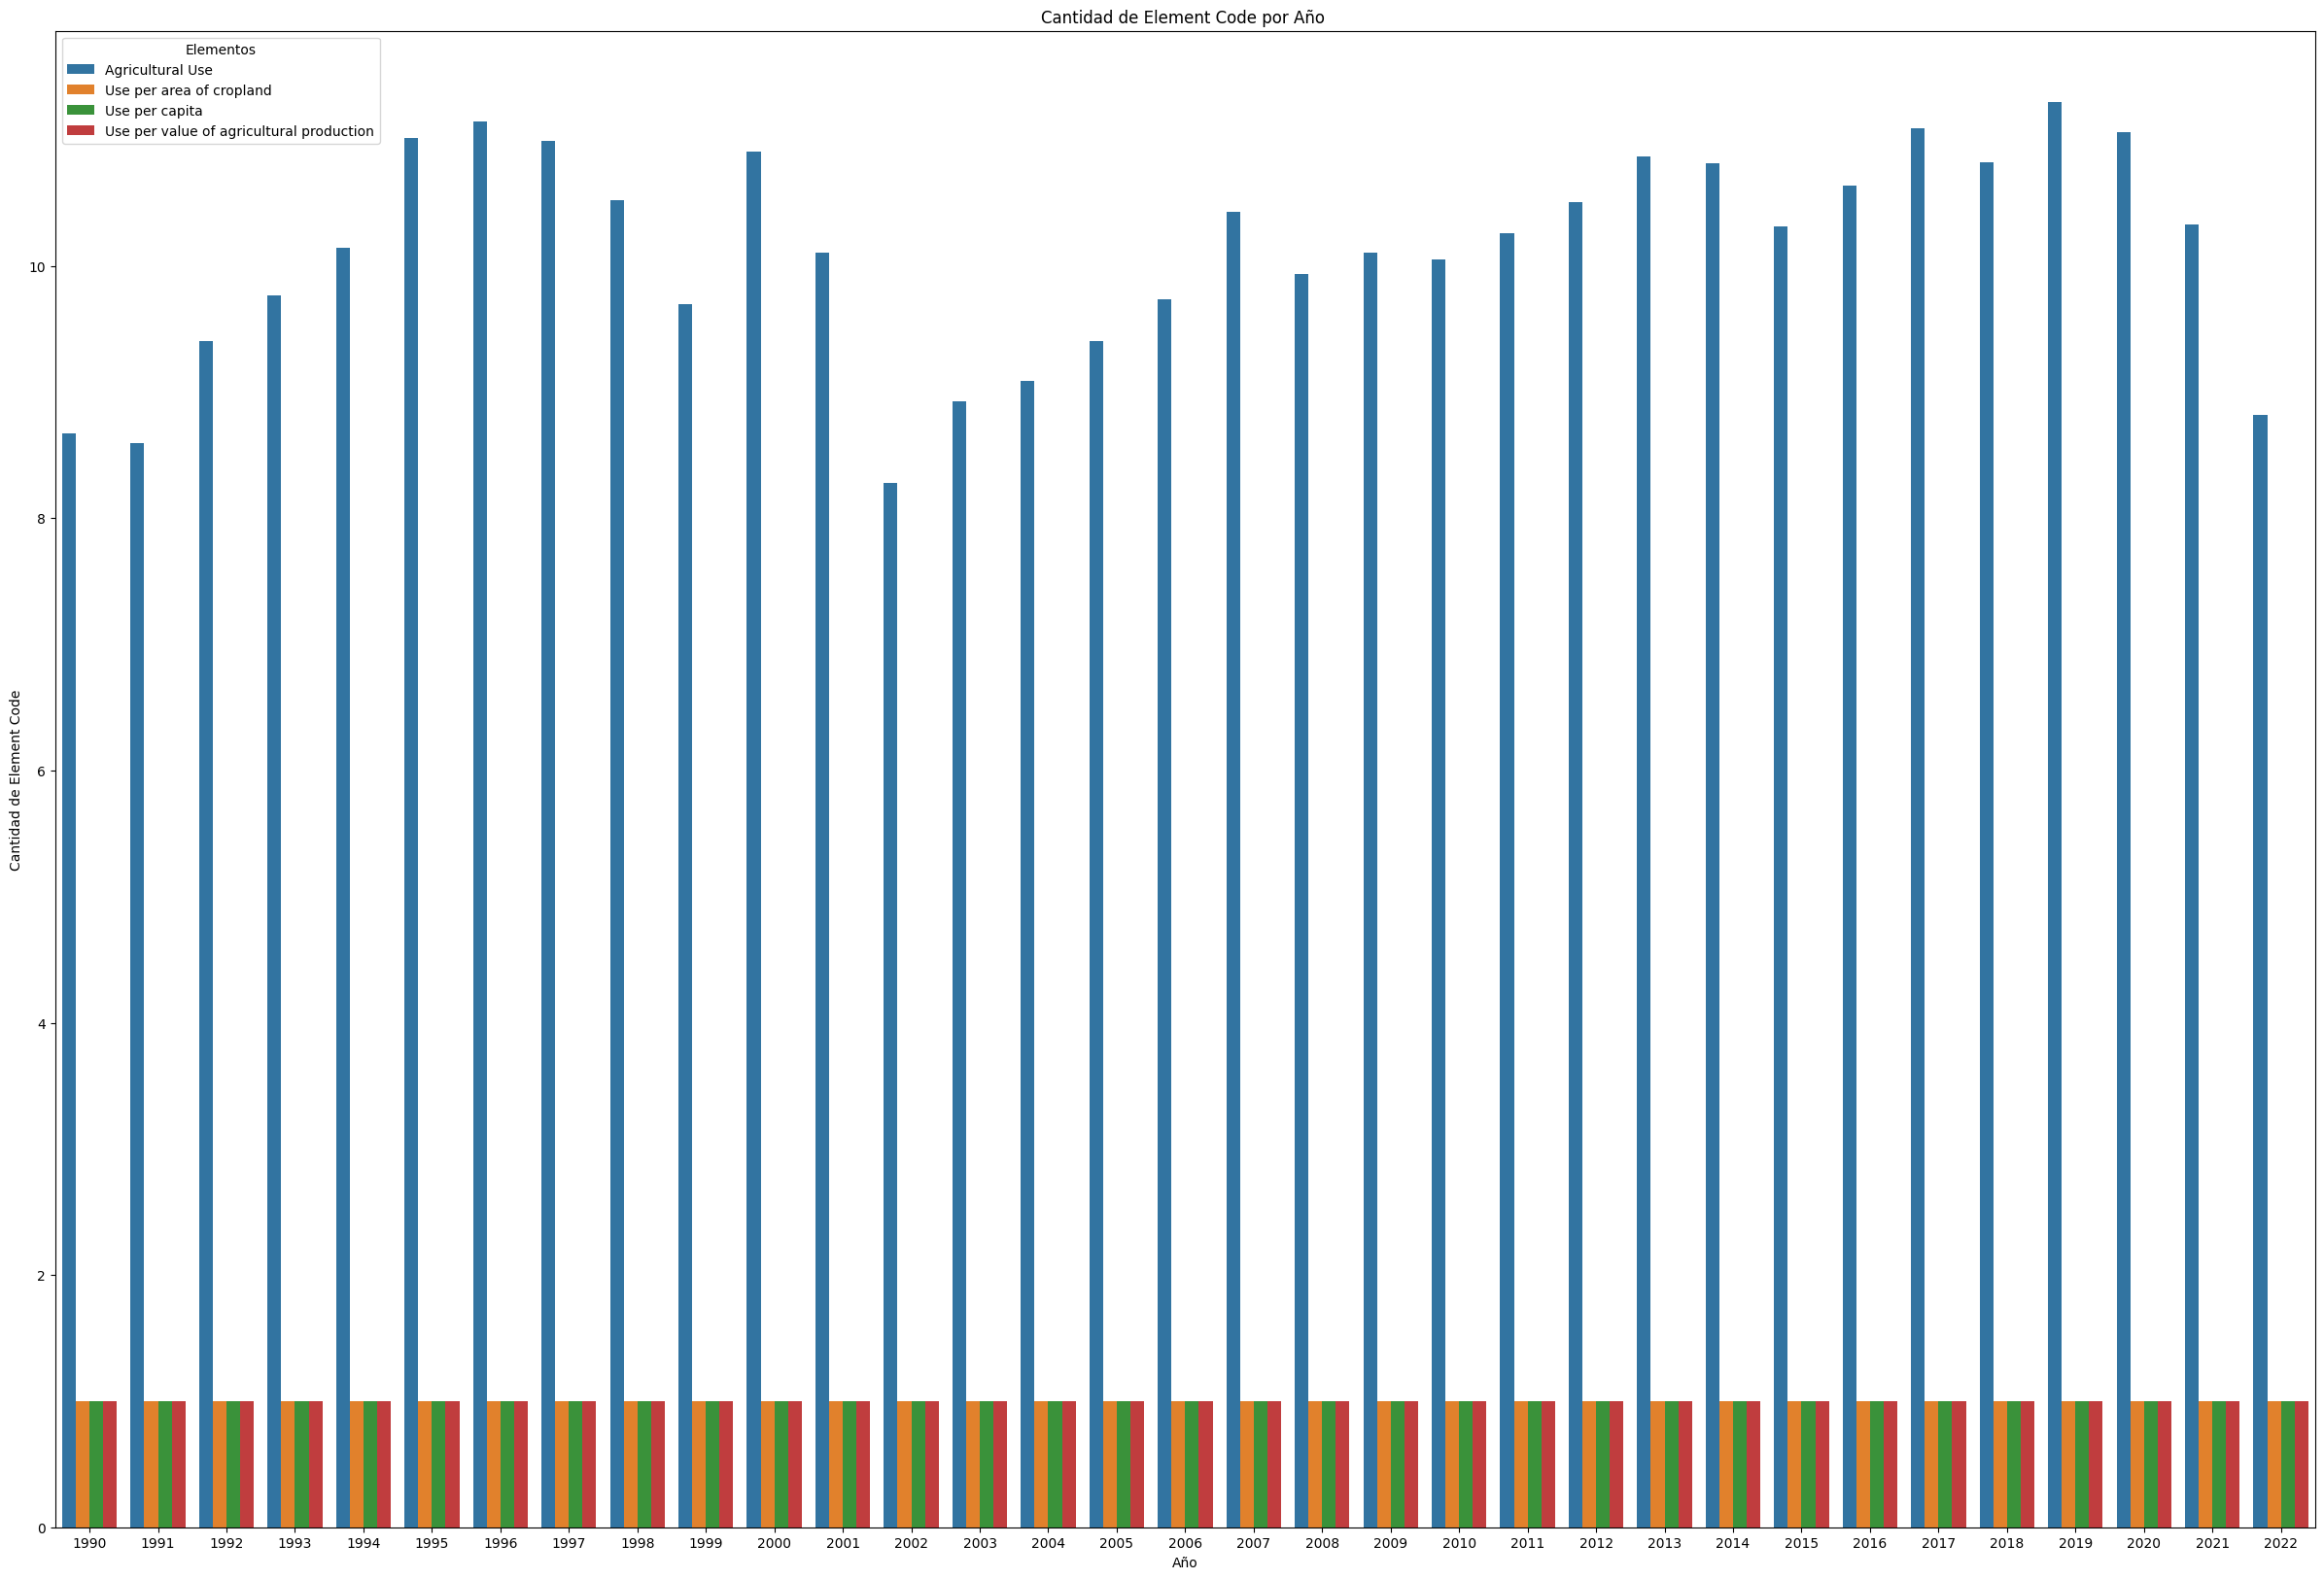

In [23]:
#Este grafico muestra la cantidad de elementos que se fueron utiliando en los distintos años en donde se observa que el mas utilizado fue el agricultural Use#

# Crear el gráfico
plt.figure(figsize=(30, 20))
sns.barplot(x='Year', y='Cantidad', hue='Element', data=df_merge, ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad de Element Code')
plt.title('Cantidad de Element Code por Año ')
plt.legend(title='Elementos')
plt.show()

In [24]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.17,E,Estimated value,0
2,RP,Pesticides Use,8,Albania,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.04,E,Estimated value,0
3,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,0.12,E,Estimated value,0
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value


In [25]:
df['Unit'].unique()

array(['t', 'kg/ha', 'kg/cap', 'g/Int$'], dtype=object)

In [26]:
df_unit_t = df.query("Unit == 't'")
df_unit_t



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,121.00,I,Imputed value,Imputed value
4,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,121.00,I,Imputed value,Imputed value
7,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1992,1992,t,121.00,I,Imputed value,Imputed value
10,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1993,1993,t,121.00,A,Official figure,Official figure
14,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),1994,1994,t,201.00,A,Official figure,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88965,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2018,2018,t,42.77,I,Imputed value,Imputed value
88966,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2019,2019,t,42.77,I,Imputed value,Imputed value
88967,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2020,2020,t,42.77,I,Imputed value,Imputed value
88968,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1355,Other Pesticides nes,2021,2021,t,42.77,I,Imputed value,Imputed value


In [27]:

df_por_año_unit_T = df_unit_t.groupby(['Element Code', 'Year','Value']).size().reset_index(name='Cantidad')
df_por_año_unit_T

df_merge = pd.merge(df_por_año_unit_T, df[[ 'Element Code', 'Element','Year','Value']],
                     on=['Element Code','Year'], how='left').drop_duplicates()
df_merge


,Element Code,Year,Value_x,Cantidad,Element,Value_y
0,5157,1990,0.00,153,Agricultural Use,121.00
1,5157,1990,0.00,153,Agricultural Use,70.00
2,5157,1990,0.00,153,Agricultural Use,5.00
3,5157,1990,0.00,153,Agricultural Use,44.00
4,5157,1990,0.00,153,Agricultural Use,0.00
...,...,...,...,...,...,...
105406578,5157,2022,800652.17,1,Agricultural Use,1099.49
105406579,5157,2022,800652.17,1,Agricultural Use,549.41
105406580,5157,2022,800652.17,1,Agricultural Use,360.00
105406581,5157,2022,800652.17,1,Agricultural Use,133.40


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\3751219662.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Cantidad', hue='Element', data=df_merge, ci=None)


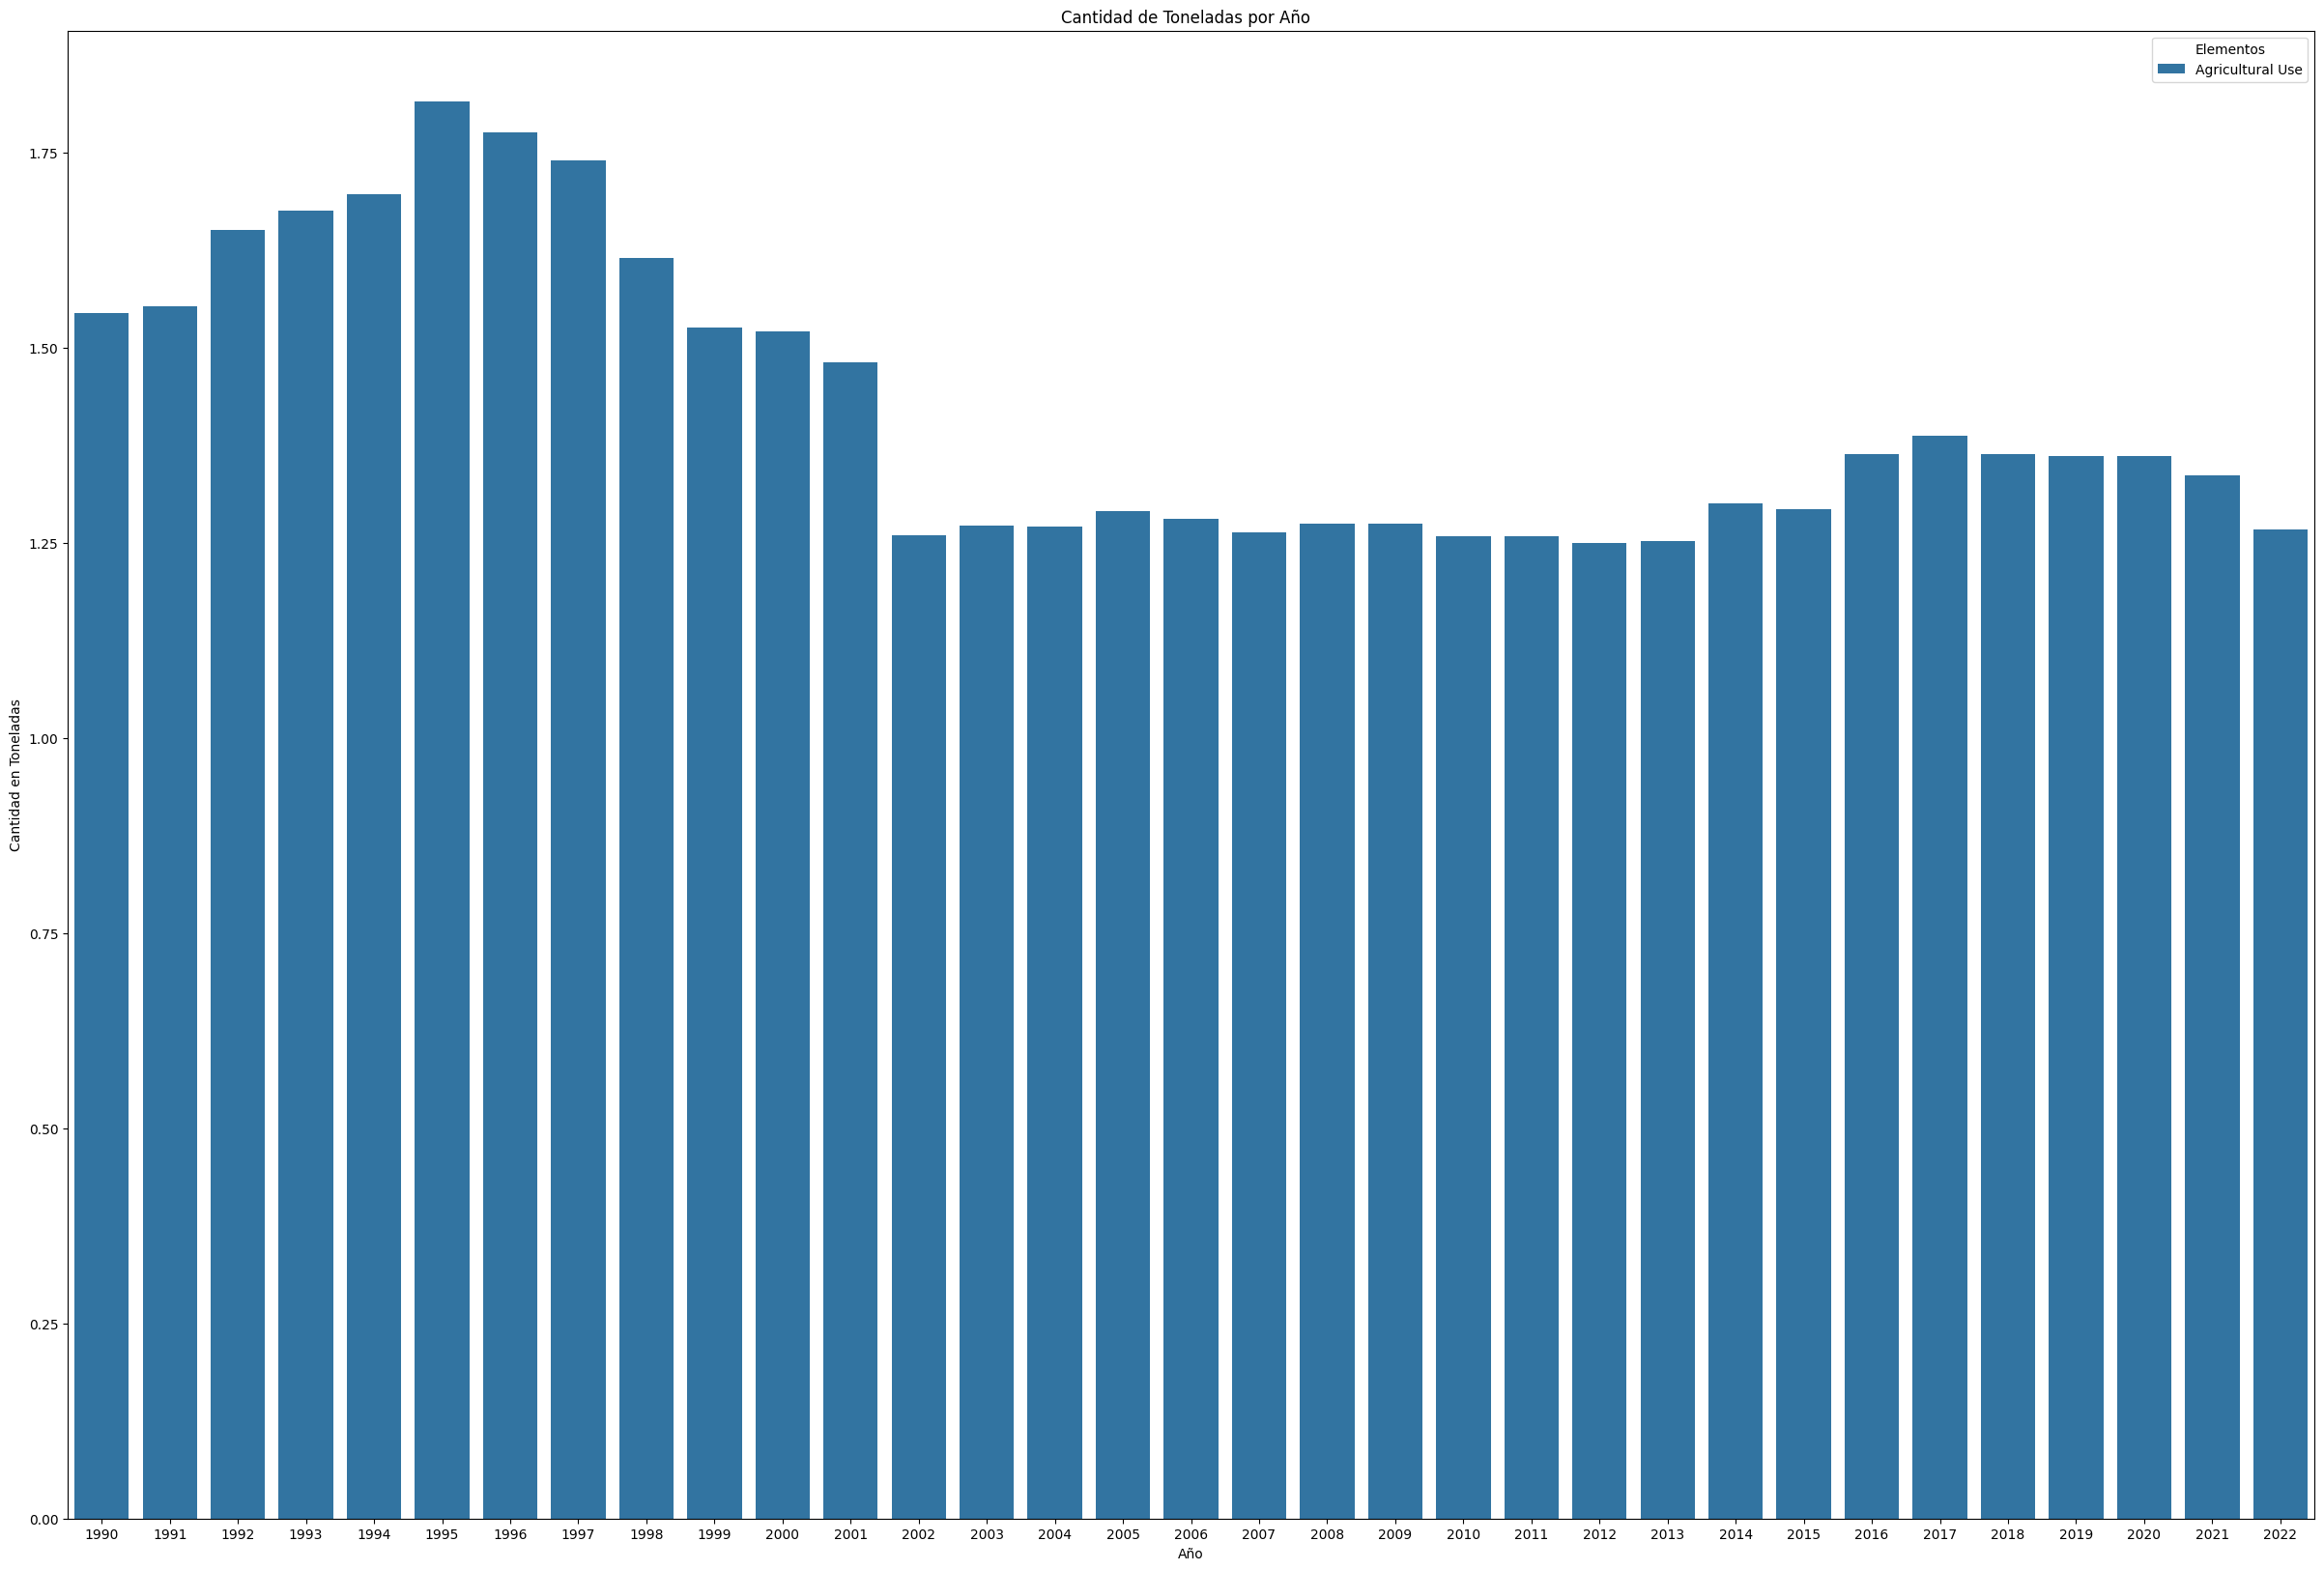

In [28]:
plt.figure(figsize=(30, 20))
sns.barplot(x='Year', y='Cantidad', hue='Element', data=df_merge, ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad en Toneladas')
plt.title('Cantidad de Toneladas por Año  ')
plt.legend(title='Elementos')
plt.show()

In [29]:

df_por_año_unit_T = df_unit_t.groupby(['Element Code', 'Year','Value','Item']).size().reset_index(name='Cantidad')
df_por_año_unit_T

df_merge = pd.merge(df_por_año_unit_T, df[[ 'Element Code', 'Element','Year','Value', 'Item']],
                     on=['Element Code','Year'], how='left').drop_duplicates()
df_merge


,Element Code,Year,Value_x,Item_x,Cantidad,Element,Value_y,Item_y
0,5157,1990,0.00,Fung & Bact – Benzimidazoles,2,Agricultural Use,121.00,Pesticides (total)
1,5157,1990,0.00,Fung & Bact – Benzimidazoles,2,Agricultural Use,70.00,Insecticides
2,5157,1990,0.00,Fung & Bact – Benzimidazoles,2,Agricultural Use,5.00,Herbicides
3,5157,1990,0.00,Fung & Bact – Benzimidazoles,2,Agricultural Use,44.00,Fungicides and Bactericides
4,5157,1990,0.00,Fung & Bact – Benzimidazoles,2,Agricultural Use,0.00,Plant Growth Regulators
...,...,...,...,...,...,...,...,...
129535256,5157,2022,800652.17,Pesticides (total),1,Agricultural Use,1099.49,Insecticides
129535257,5157,2022,800652.17,Pesticides (total),1,Agricultural Use,549.41,Herbicides
129535258,5157,2022,800652.17,Pesticides (total),1,Agricultural Use,360.00,Fungicides and Bactericides
129535259,5157,2022,800652.17,Pesticides (total),1,Agricultural Use,133.40,Plant Growth Regulators


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\91786153.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Value_y', hue='Item_y', data=df_merge, ci=None)


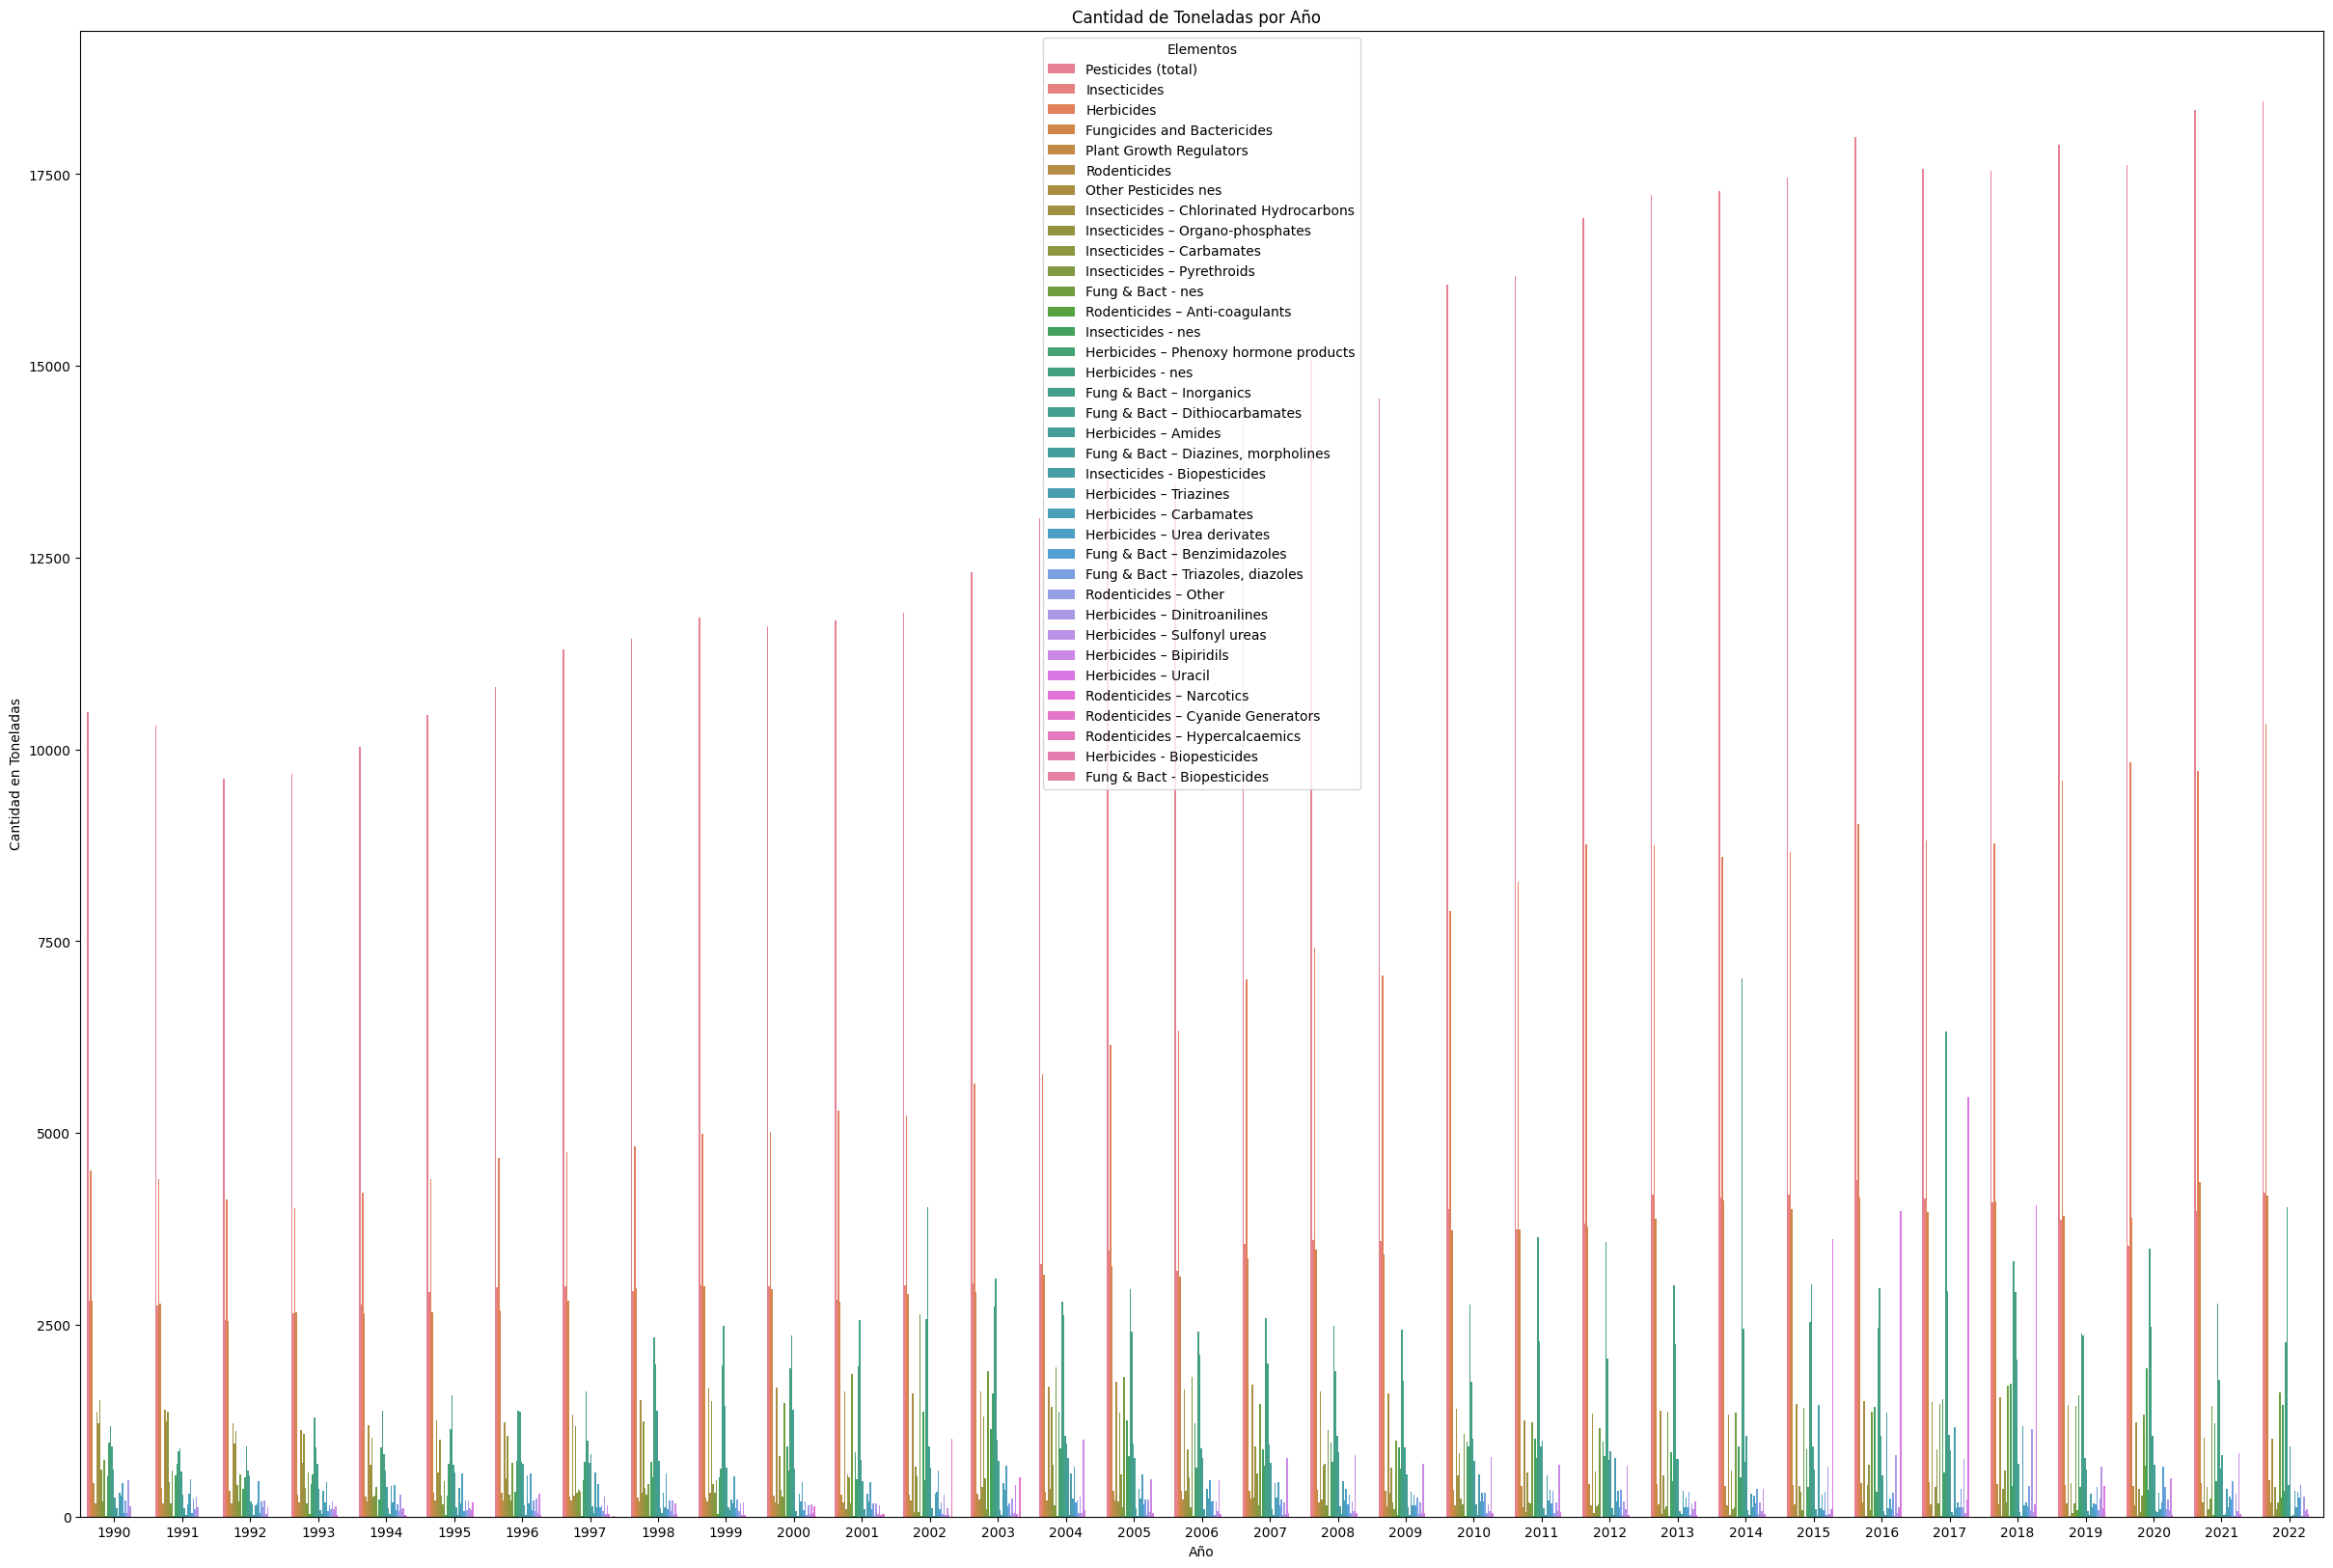

In [30]:
plt.figure(figsize=(30, 20))
sns.barplot(x='Year', y='Value_y', hue='Item_y', data=df_merge, ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad en Toneladas')
plt.title('Cantidad de Toneladas por Año  ')
plt.legend(title='Elementos')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\3998512602.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Total de Toneladas', hue='Item', data=df_por_año_unit_T_sin_pests_total, ci=None)


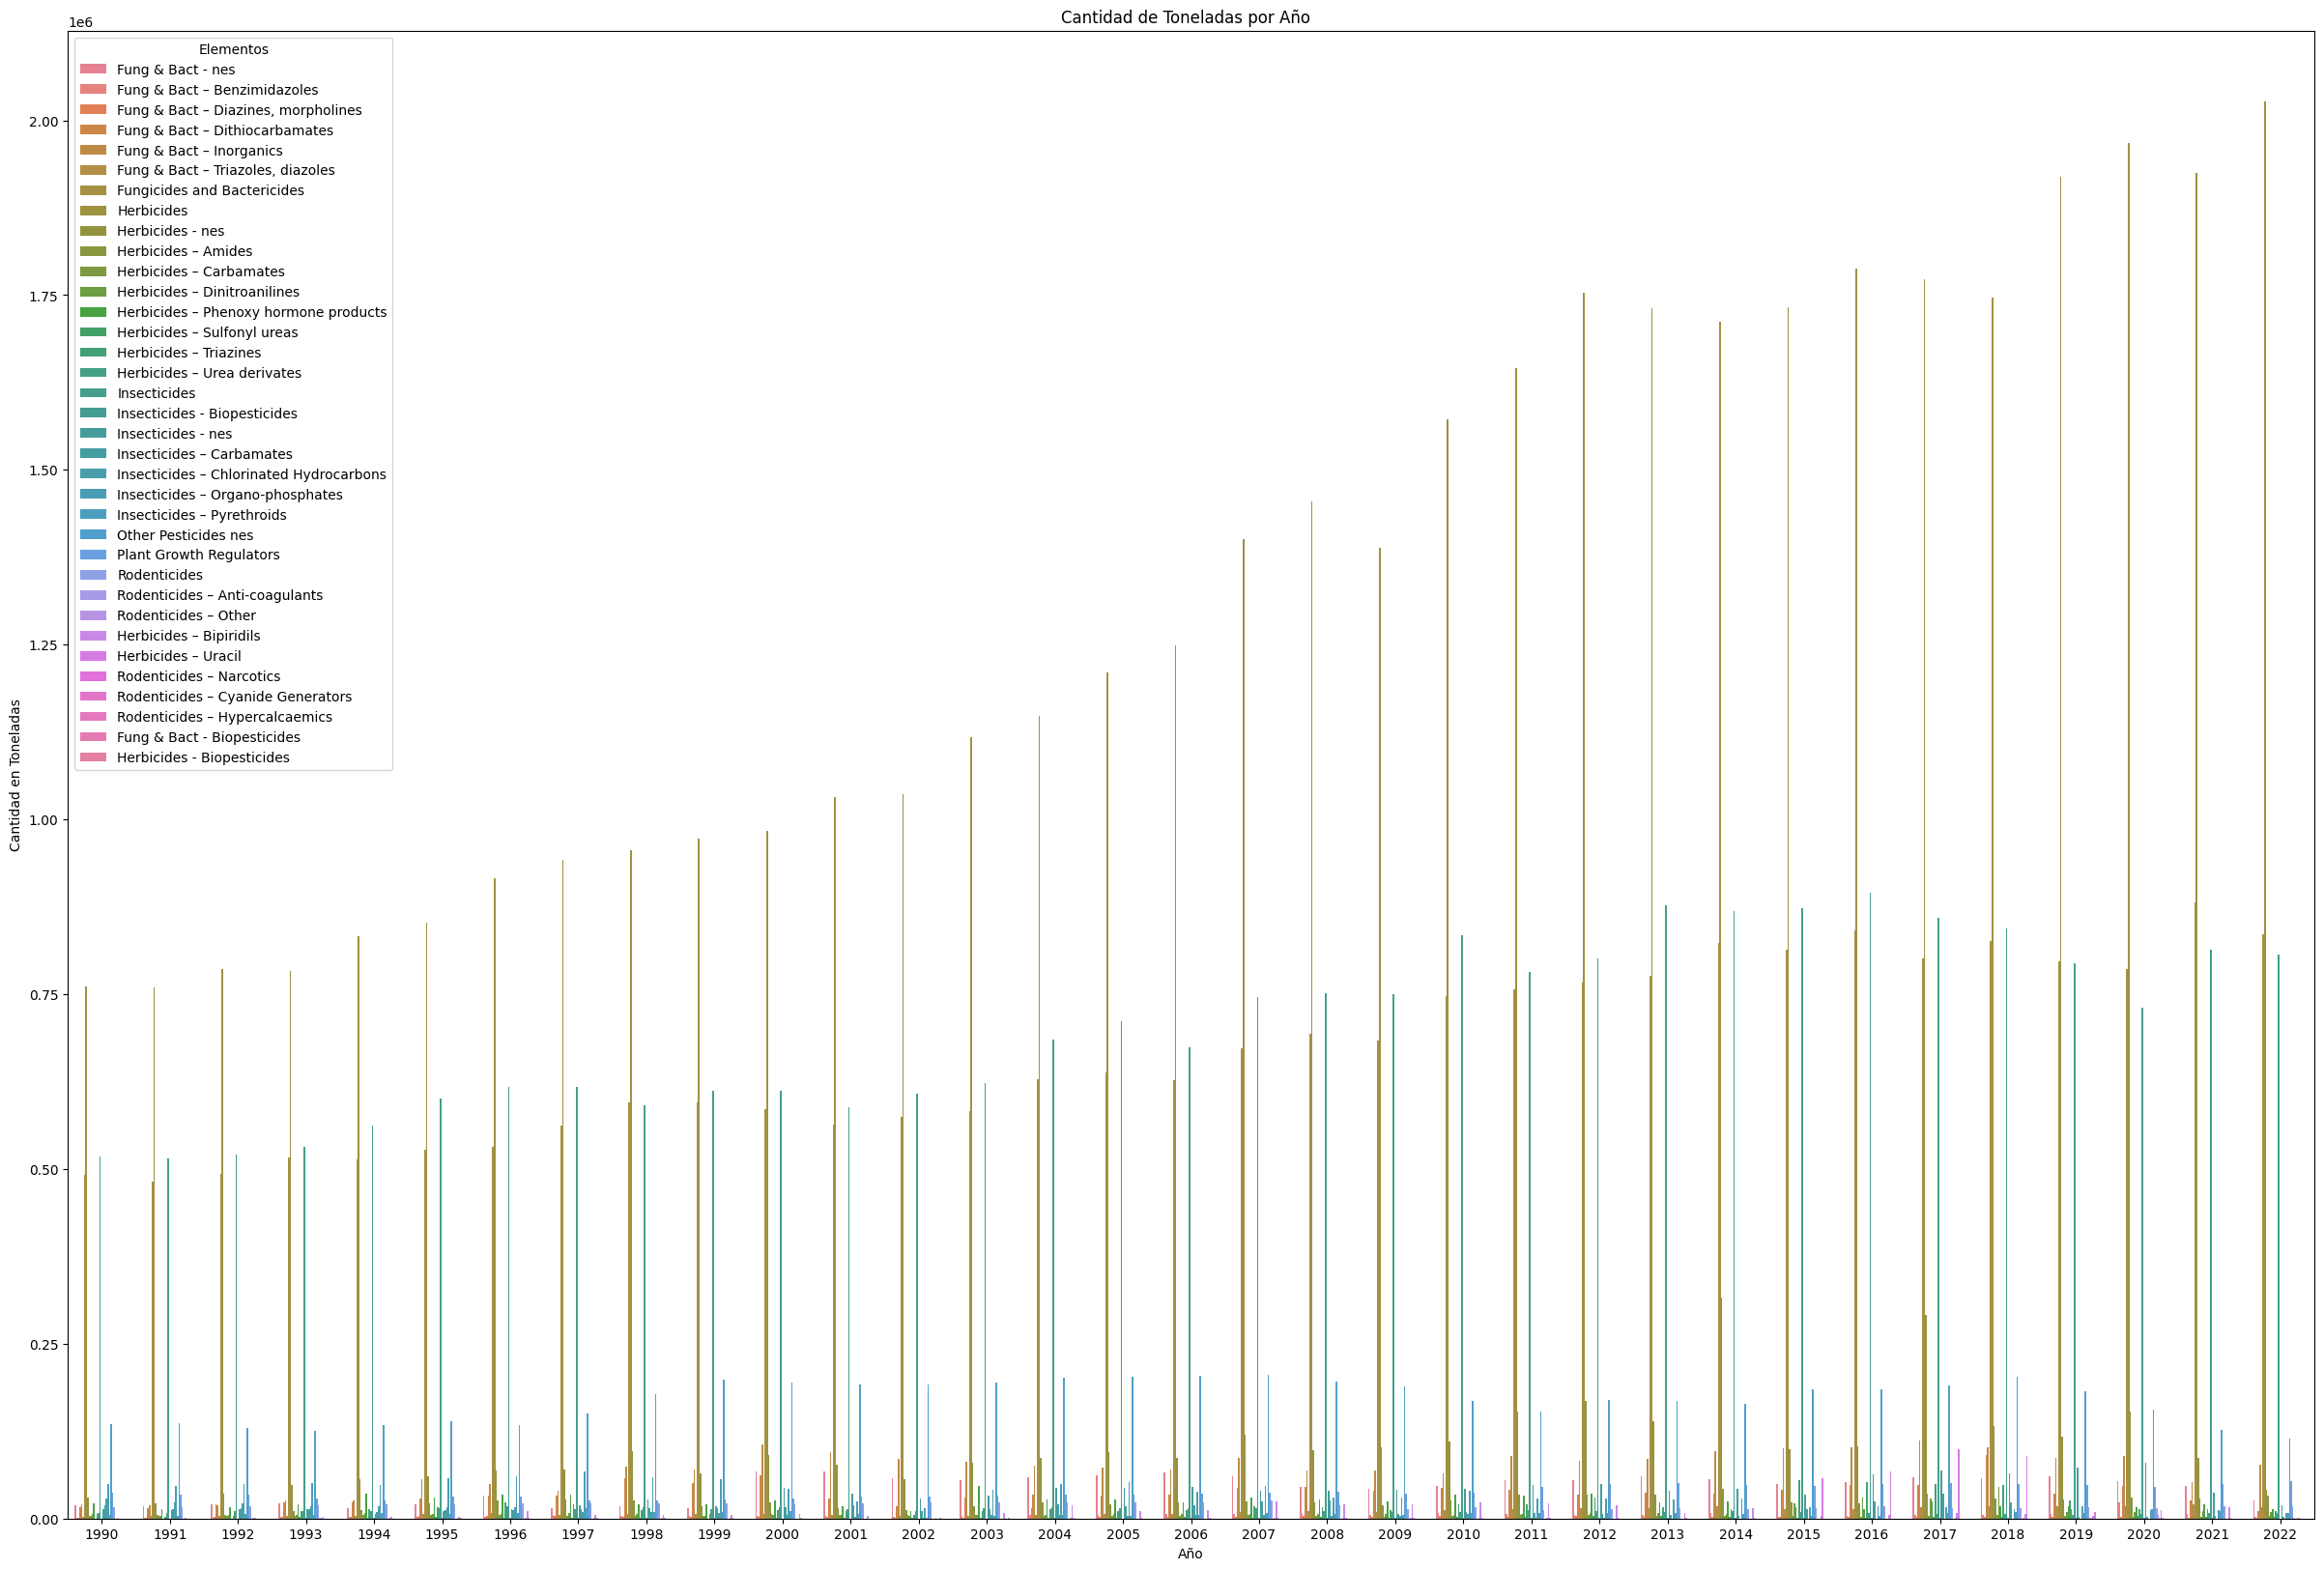

In [59]:

df_por_año_unit_T = df_unit_t.groupby(['Element Code', 'Year','Item', 'Value']).size().reset_index(name='Cantidad')
df_por_año_unit_T

df_sum_tonel_por_items = df_por_año_unit_T.groupby(['Year','Item'])['Value'].sum().reset_index(name='Total de Toneladas')
df_sum_tonel_por_items

#df_sum_tonel_por_items_Insecticides = df_sum_tonel_por_items.query(" Item   ==  'Insecticides' ")
#df_sum_tonel_por_items_Insecticides

df_por_año_unit_T_sin_pests_total = df_sum_tonel_por_items.query("Item != 'Pesticides (total)'")
df_por_año_unit_T_sin_pests_total

# df_merge = pd.merge(df_por_año_unit_T_sin_pests_total, df[[ 'Element Code', 'Element','Year']],
#                       on=['Year'], how='left').drop_duplicates()
# df_merge
# print(df_por_año_unit_T_sin_pests_total.head().T)
# print(df.head().T)

plt.figure(figsize=(30, 20))
sns.barplot(x='Year', y='Total de Toneladas', hue='Item', data=df_por_año_unit_T_sin_pests_total, ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad en Toneladas')
plt.title('Cantidad de Toneladas por Año  ')
plt.legend(title='Elementos')
plt.show()


In [75]:
df_Pesticides_total_90 = df.query(" Item ==  'Pesticides (total)'& Year == 1990 & Unit == 't'").sort_values(by = 'Value', ascending= True)
df_Pesticides_total_90.head(15)

df_sum_total = df_Pesticides_total_90['Value'].sum()
df_sum_total

1960822.27

In [79]:
df_Pesticides_total_90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 58454 to 85581
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       187 non-null    object 
 1   Domain            187 non-null    object 
 2   Area Code (M49)   187 non-null    int64  
 3   Area              187 non-null    object 
 4   Element Code      187 non-null    int64  
 5   Element           187 non-null    object 
 6   Item Code         187 non-null    int64  
 7   Item              187 non-null    object 
 8   Year Code         187 non-null    int64  
 9   Year              187 non-null    int64  
 10  Unit              187 non-null    object 
 11  Value             187 non-null    float64
 12  Flag              187 non-null    object 
 13  Flag Description  187 non-null    object 
 14  Note              187 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 23.4+ KB


In [86]:
pd.reset_option('display.max_rows', None)


df_por_año_unit_T = df_unit_t.groupby(['Element Code', 'Year','Item', 'Value']).size().reset_index(name='Cantidad')
df_por_año_unit_T

df_Insecticides_totales = df_por_año_unit_T.query(" Item ==  'Pesticides (total)'  ")

df_sum_totales = df_Insecticides_totales.groupby('Year')['Value'].sum().reset_index(name='Total Value')
df_sum_totales

# df_Insecticides = df_por_año_unit_T.query("Item == 'Insecticides'")
# df_Insecticides

# df_sum_isecticides = df_Insecticides.groupby('Year')['Value'].sum().reset_index(name='Total Toneladas')
# df_sum_isecticides

#df_sum_tonel_por_items = df_por_año_unit_T.groupby('Item')['Value'].sum().reset_index(name='Total de Toneladas')
#df_sum_tonel_por_items


# sns.scatterplot(x=df_Insecticides_totales['Year'], y=df_Insecticides_totales['Value'], color='red')
# plt.title("Valores utilizados por año ")
# plt.show()



,Year,Total Value
0,1990,1960822.27
1,1991,1947745.07
2,1992,1980990.31
3,1993,2005197.11
4,1994,2088026.34
5,1995,2173313.49
6,1996,2250187.05
7,1997,2328159.84
8,1998,2367777.60
9,1999,2425636.62


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\1855971053.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Total Value', data=df_sum_totales, ci=None)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\1855971053.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Elementos')


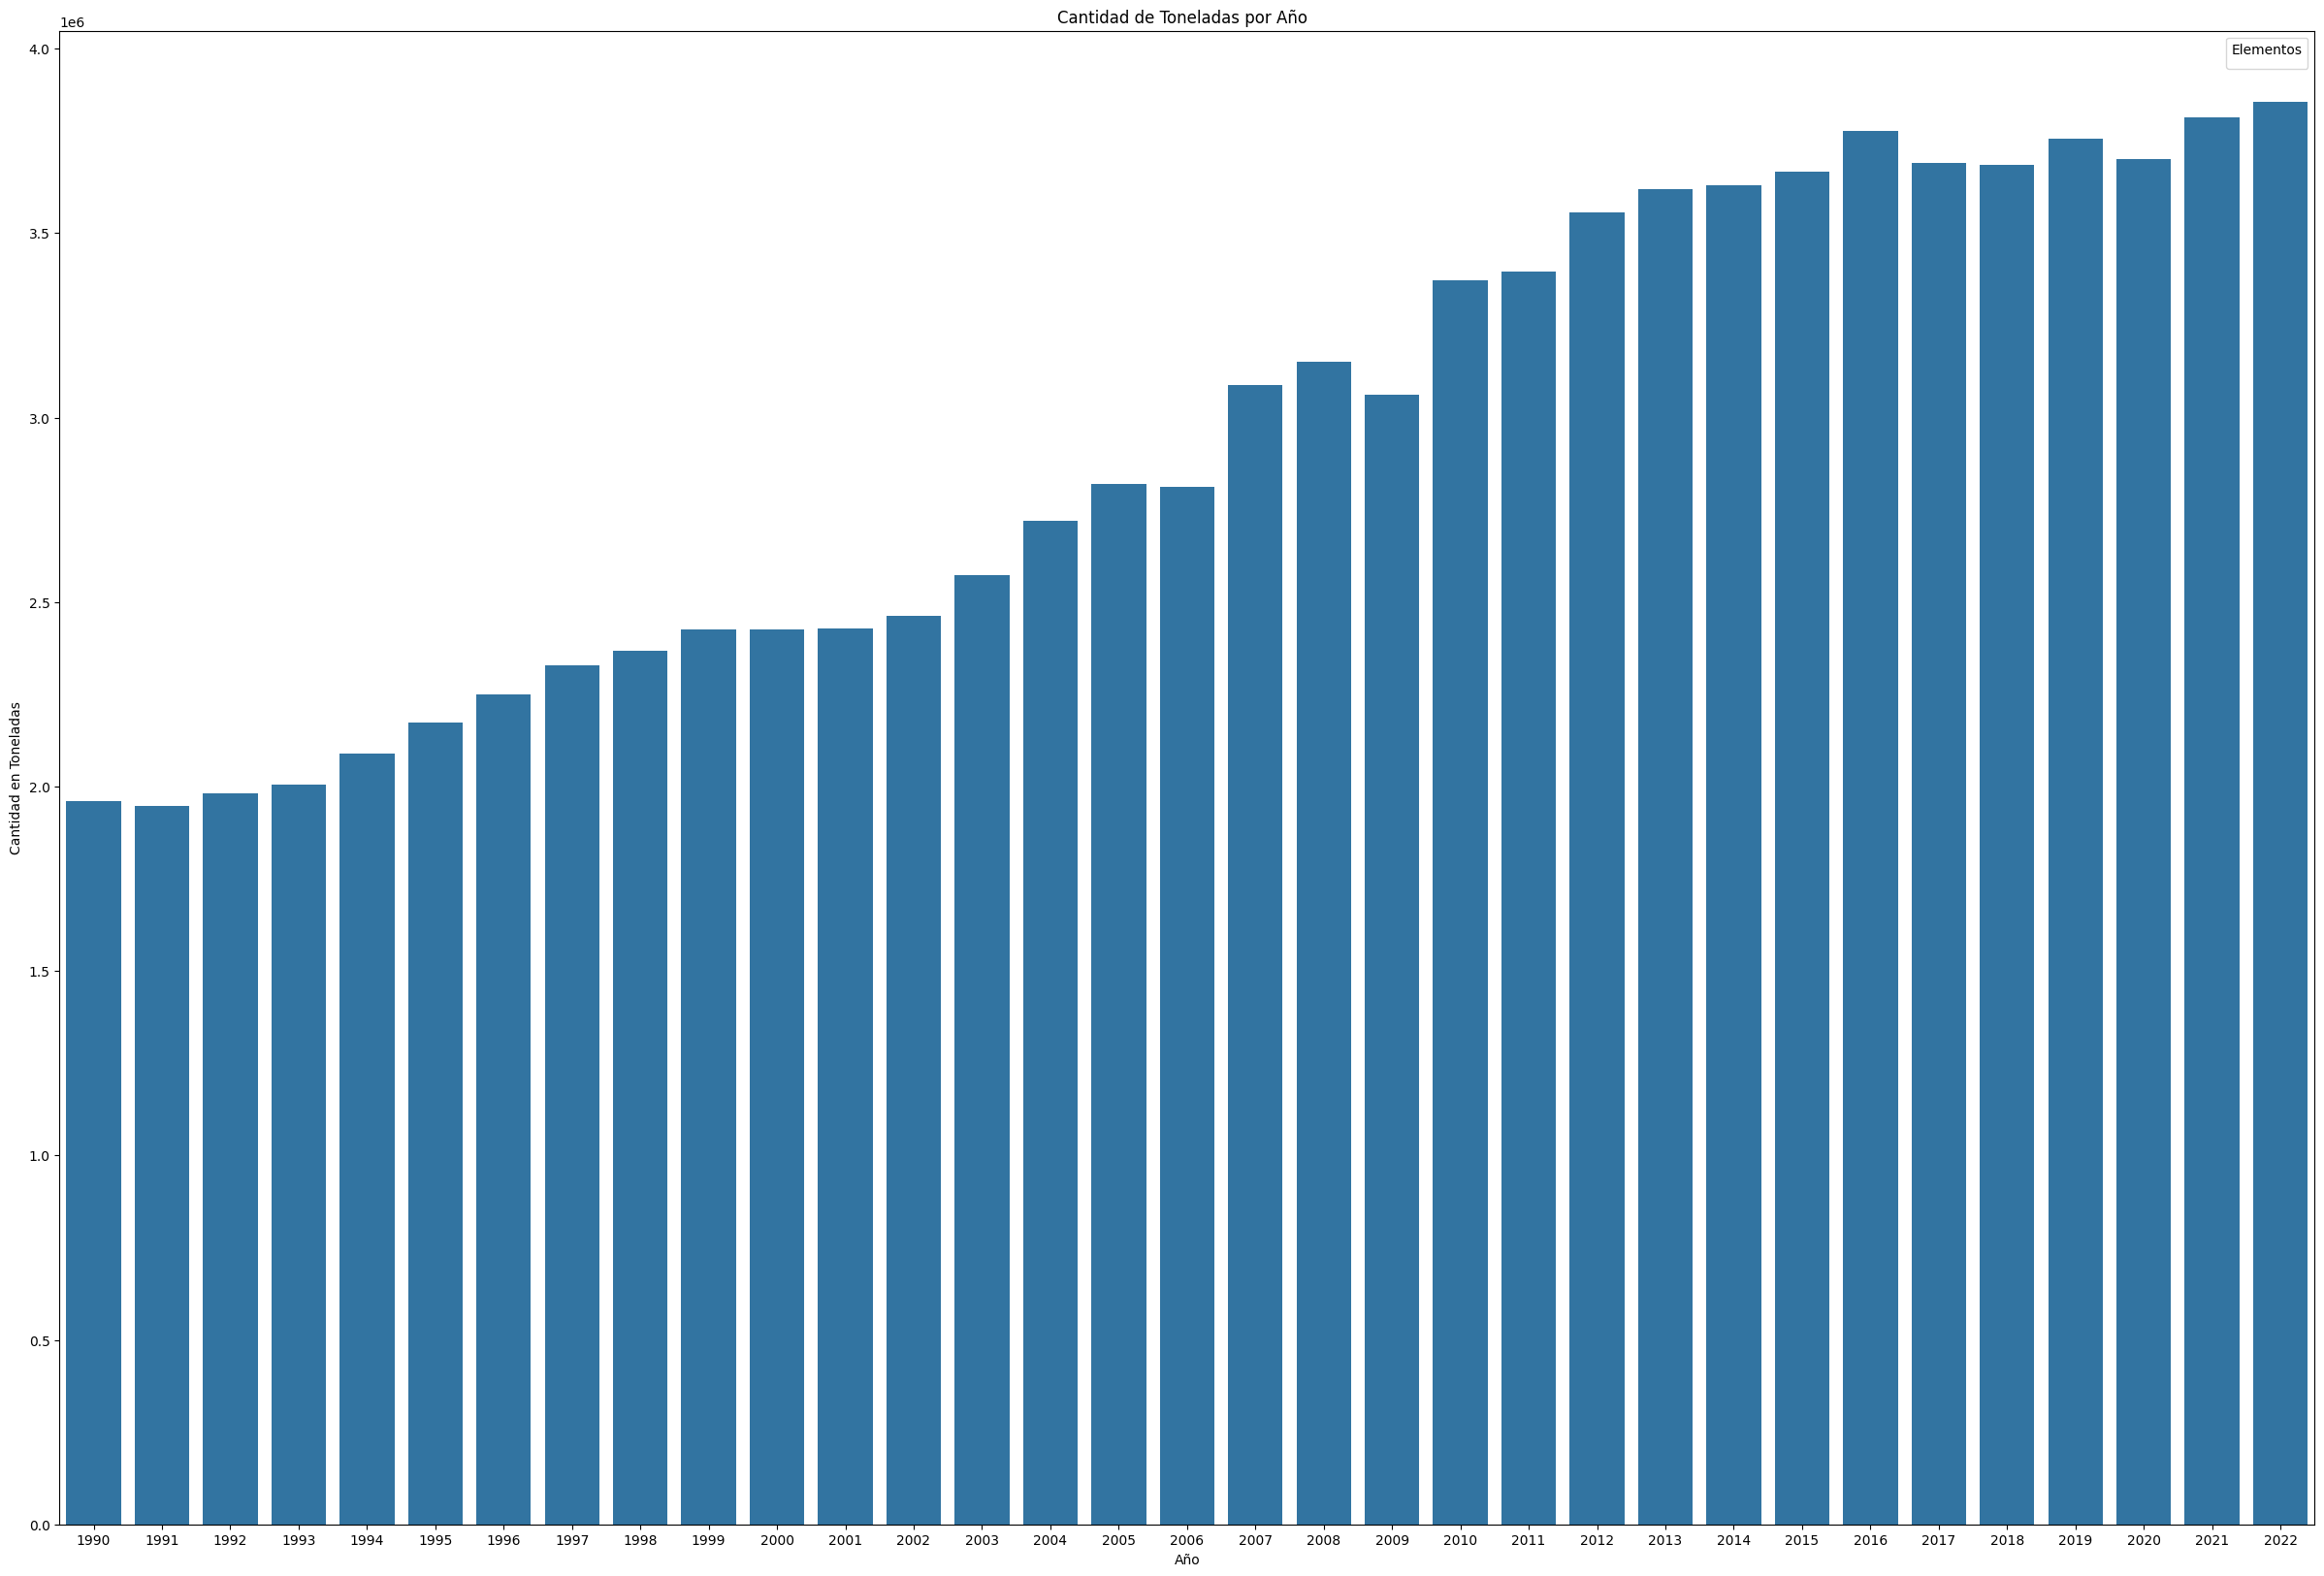

In [81]:

plt.figure(figsize=(30, 20))
sns.barplot(x='Year', y='Total Value', data=df_sum_totales, ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad en Toneladas')
plt.title('Cantidad de Toneladas por Año  ')
plt.legend(title='Elementos')
plt.show()


In [93]:

df_por_año_unit_T = df_unit_t.groupby(['Element Code', 'Year','Item', 'Value']).size().reset_index(name='Cantidad')
#df_por_año_unit_T

df_Insecticides_sin_totales = df_por_año_unit_T.query(" Item !=  'Pesticides (total)'  ")
df_Insecticides_sin_totales

df_sum_totales_sin_totales = df_Insecticides_sin_totales.groupby('Year')['Value'].sum().reset_index(name='Total Value')
df_sum_totales_sin_totales

,Year,Total Value
0,1990,2214040.06
1,1991,2157680.57
2,1992,2234269.03
3,1993,2298646.69
4,1994,2396951.33
5,1995,2557836.86
6,1996,2685865.63
7,1997,2729071.59
8,1998,2836825.13
9,1999,2818243.67


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\3502585389.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Total Value', data=df_sum_totales_sin_totales, ci=None)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17292\3502585389.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Elementos')


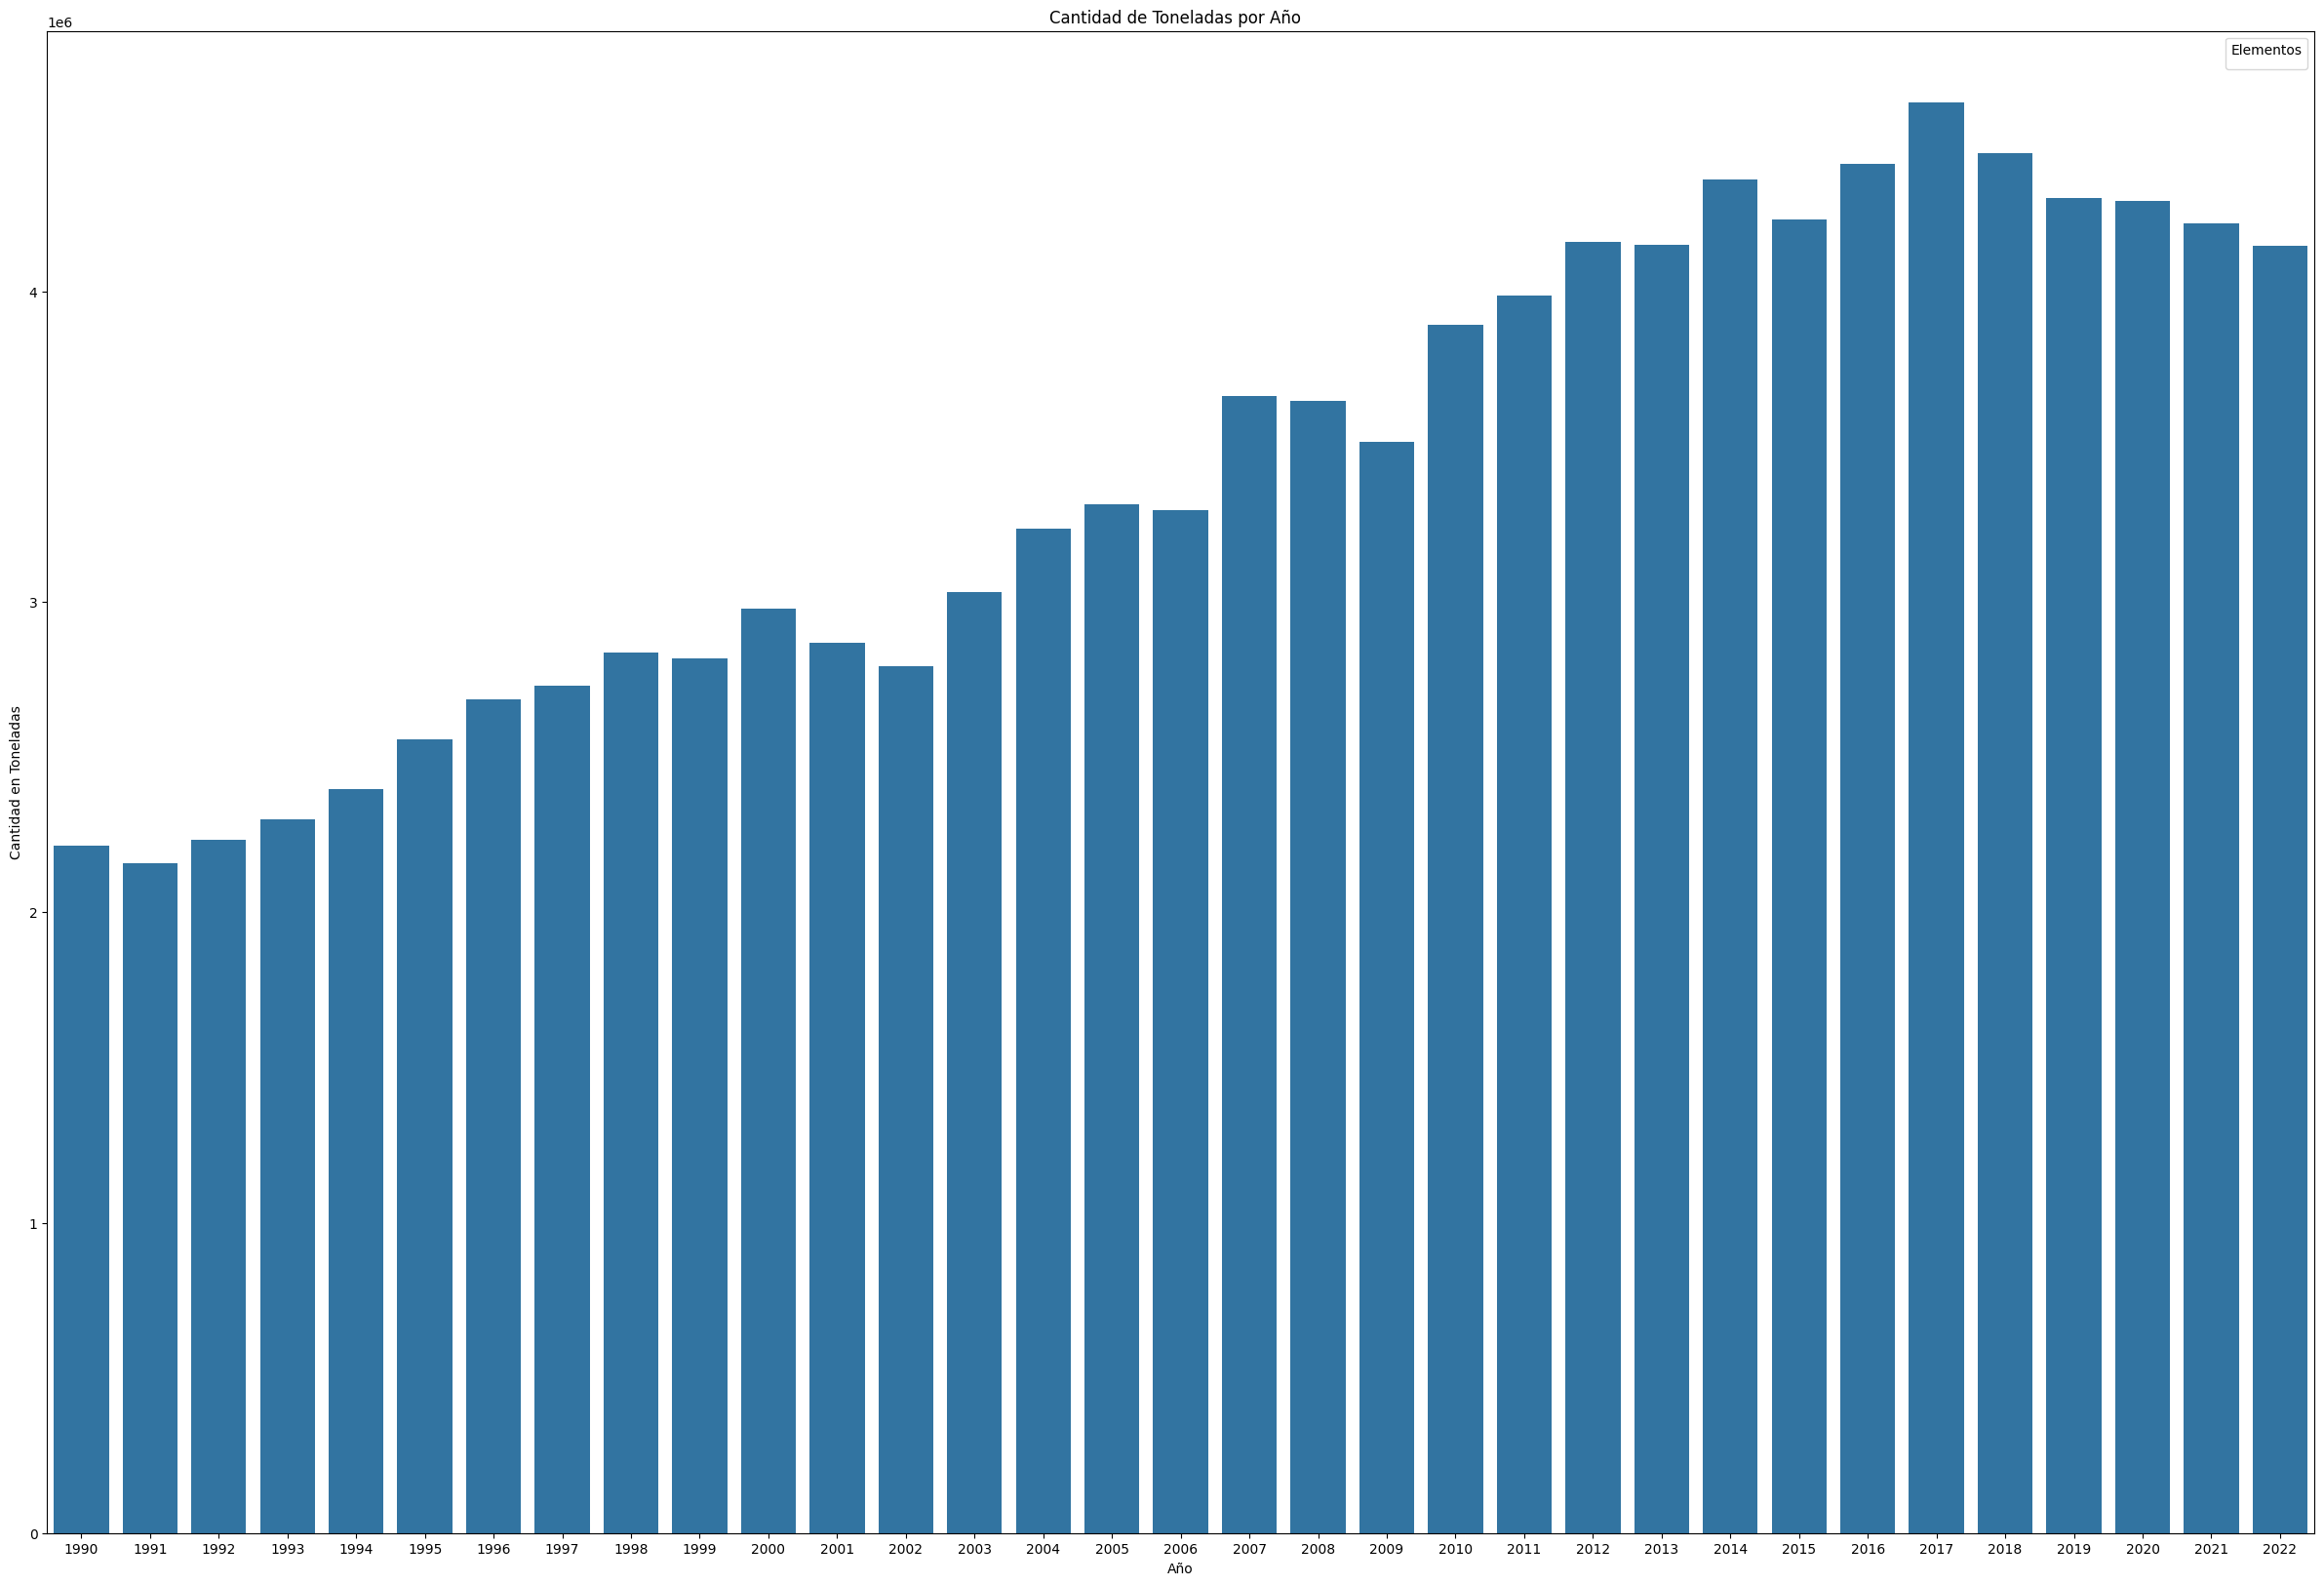

In [94]:
plt.figure(figsize=(30, 20))
sns.barplot(x='Year', y='Total Value', data=df_sum_totales_sin_totales, ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad en Toneladas')
plt.title('Cantidad de Toneladas por Año  ')
plt.legend(title='Elementos')
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [107]:
X = df_sum_totales_sin_totales.drop('Year', axis=1)
y = df_sum_totales_sin_totales['Year']

#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [108]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [109]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 6.020761294410275
R^2: 0.9008011757141549


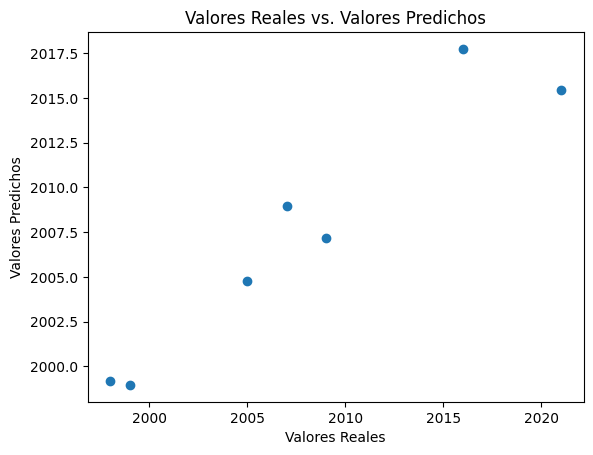

In [110]:
# Comparar los valores reales y predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

In [112]:
from sklearn.linear_model import Ridge
# Crear y entrenar un modelo de regresión Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [113]:
 #Hacer predicciones en el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test)

In [114]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [115]:
print(f'Ridge MSE: {mse_ridge}')
print(f'Ridge R^2: {r2_ridge}')

Ridge MSE: 6.02076129441093
Ridge R^2: 0.9008011757141441


In [116]:

# Calcular los residuos
residuals = y_test - y_pred_ridge

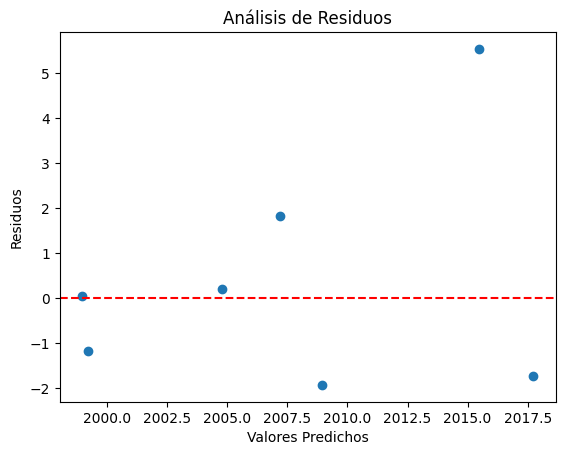

In [117]:
# Visualizar los residuos
plt.scatter(y_pred_ridge, residuals)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [118]:
from sklearn.model_selection import cross_val_score

# Evaluar el modelo usando validación cruzada
scores = cross_val_score(ridge_model, X, y, cv=5)
print(f'Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Scores: [ 0.45911747  0.27733491  0.52215789 -3.39310148 -8.61035739]
Mean Score: -2.1489697208012615


In [119]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar un modelo de regresión Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R^2: {r2_rf}')

Random Forest MSE: 7.673242857142946
Random Forest R^2: 0.8735746805648943


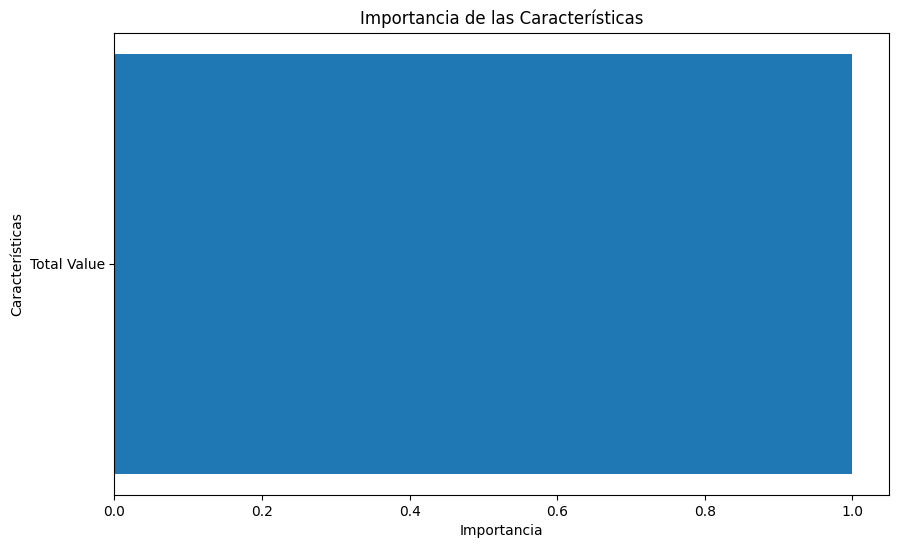

In [120]:

# Visualización de Importancia de Características
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()
plt.show()

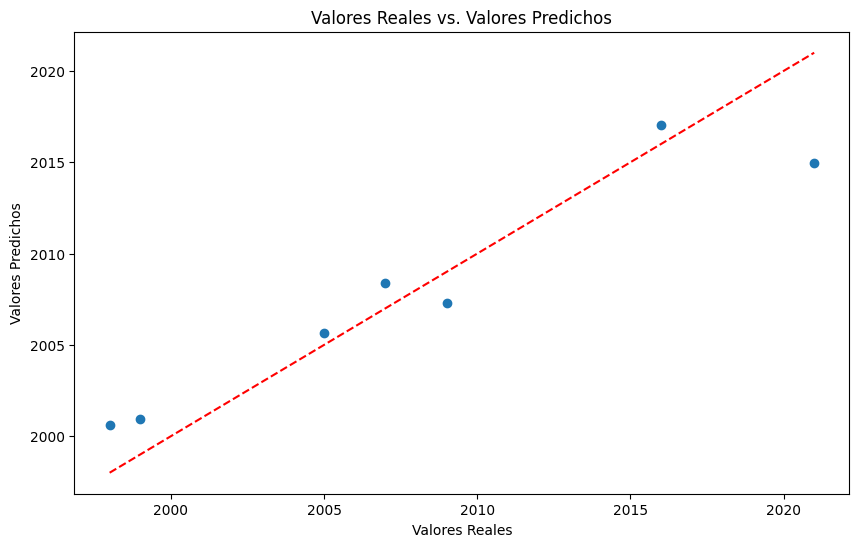

In [121]:

# Visualización de Valores Reales vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

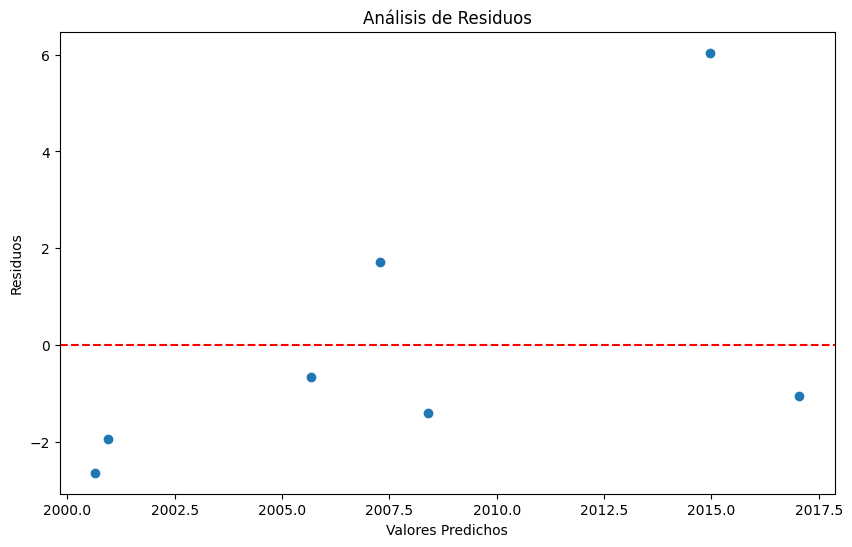

In [122]:

# Análisis de Residuos
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

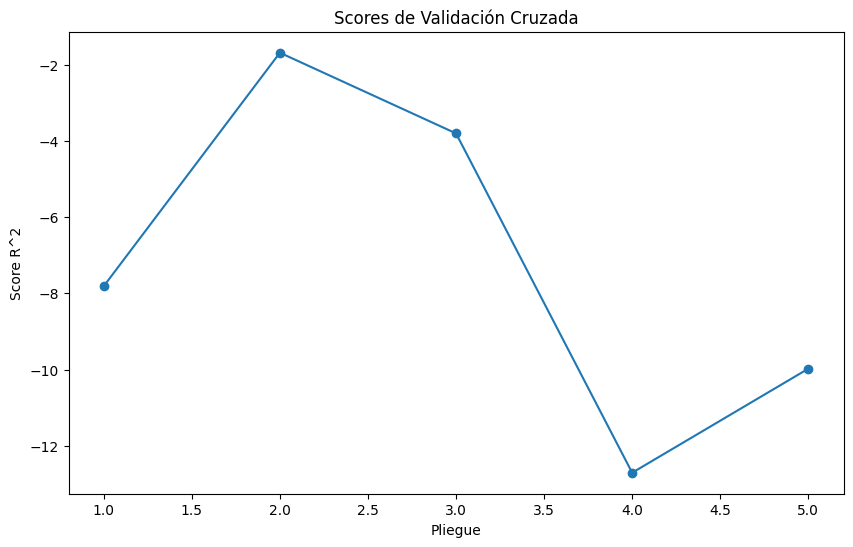

In [123]:

# Validación Cruzada
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(rf_model, X, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_rf, marker='o')
plt.xlabel('Pliegue')
plt.ylabel('Score R^2')
plt.title('Scores de Validación Cruzada')
plt.show()